<a href="https://colab.research.google.com/github/KrushnaChaure/NYC-Taxi-Trip-Time-Prediction/blob/main/Krushna_Chaure_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - NYC Taxi Trip Time Prediction**

**Project Type** - Regression

**Contribution** - Individual 

# **Problem Statement**

Our task is to build a machine learning model that predicts the total ride duration of taxi trips in New York City. Our primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.


# **Lets Begin & Kick start our journy**

## **1. Know Our Data**

### Import Libraries

In [1]:
#Install Library  use to calculate the haversine distance 

!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importing necessary libraries for our project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as math
import warnings
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')
from haversine import haversine
from datetime import datetime
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
import xgboost
import datetime as dt
from scipy.stats import *
import math
import statsmodels.api as sm
# Importing Machine Learning Libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

### Dataset Loading


In [3]:
# Firstly we mount the drive over this colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Here we connecting & importing the dataset over this colab notebook
dataset= pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/NYC Taxi Trip Time Prediction - Krushna Chaure/NYC Taxi Data.csv')

### Dataset First View

In [5]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [6]:
# For finding how many rows & columns in our dataset
dataset.shape

(1458644, 11)

### Dataset Information

In [7]:
# For finding information about our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


### Duplicate Values

In [8]:
# Here we checking duplicate values in our dataset
len(dataset[dataset.duplicated()])

0

### Missing Values/Null Values

In [9]:
# For checking NAN or Misssing/Null values in our dataset
print(dataset.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


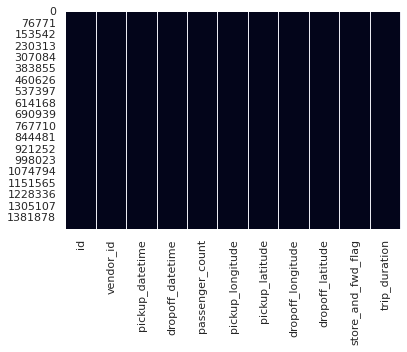

In [10]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### Understanding and Found some information about our dataset

The dataset given is dataset which is get from NYC Taxi and Limousine commission and we have to analysis total ride duration of taxi trips in new york city.

Our goal is to analysis different factors which affects taxi trip ride duration and by considering factors our end goal is to predict precise trip duration.

The above dataset has 1458644 rows and 11 columns. There are no mising values and duplicate values in the dataset.

## **2. Now understanding the variables available in dataset** 

In [11]:
# Dataset column name
dataset.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [12]:
# Dataset description
dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


From above decription of Dataset we can see that passenger_count varies from 0 to 9.

Trip_duration has max value of 3526282 seconds which is almost 979.5 hours and minimum value 1 second.

This is exactly outlier present so this affect badly our prediction, our prediction not come precisly so thats why we want to remove this outliers. 

### Variables Description

**Independent variable:-**

*   **id** - Unique identifier for each trip.
*   **vendor_id** - Code indicating the provider associated with the trip record.



*   **pickup_datetime** - Date and Time when the meter was engaged.

*   **dropoff_datetime** - Date and Time when the meter was disengaged.

*   **passenger_count** - The number of passengers in the vehicle (driver entered value)

*   **pickup_longitude** - The longitude where the meter was engaged.
*   **pickup_latitude** - The latitude where the meter was engaged.


*   **dropoff_longitude** - The longitude where the meter was disengaged.




*   **dropoff_latitude** - The latitude where the meter was disengaged.


*   **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

**Dependent or Target variable:-**


*   **trip_duration** - Duration of the trip in seconds.






Now we are Categorizing the Independent variable :

Let's divide Independent variable into categories:


*   *Geographical:* pickup_longitude , pickup_latitude , dropoff_longitude , dropoff_latitude.
*   *Time related:* pickup_datetime, dropoff_datetime.

*   *Identifier:* id(not useful for analysis)
*   *Others:* vendor_id, passenger_count, store_and_fwd_flag. 



### Checking Unique Values for each variable in dataset

In [13]:
# For checking unique values in each column
for i in dataset.columns.tolist():
  print('No. of unique values in ',i,'is',dataset[i].nunique())

No. of unique values in  id is 1458644
No. of unique values in  vendor_id is 2
No. of unique values in  pickup_datetime is 1380222
No. of unique values in  dropoff_datetime is 1380377
No. of unique values in  passenger_count is 10
No. of unique values in  pickup_longitude is 23047
No. of unique values in  pickup_latitude is 45245
No. of unique values in  dropoff_longitude is 33821
No. of unique values in  dropoff_latitude is 62519
No. of unique values in  store_and_fwd_flag is 2
No. of unique values in  trip_duration is 7417


## **3. Data Wrangling**

In [14]:
dataset[dataset['passenger_count']==0].count()

id                    60
vendor_id             60
pickup_datetime       60
dropoff_datetime      60
passenger_count       60
pickup_longitude      60
pickup_latitude       60
dropoff_longitude     60
dropoff_latitude      60
store_and_fwd_flag    60
trip_duration         60
dtype: int64

### Converting datatype

In [15]:
# Converting timestamp to datetime format to fetch the other details as listed below.
dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'])
dataset['dropoff_datetime'] = pd.to_datetime(dataset['dropoff_datetime'])
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Add new columns in dataset

In [16]:
#Calculate and assign new columns to the dataframe such as weekday,month and pickup_hour which will help us to gain more insights from the data.
dataset['weekday'] = dataset.pickup_datetime.dt.day_name
dataset['month'] = dataset.pickup_datetime.dt.month
dataset['weekday_num'] = dataset.pickup_datetime.dt.weekday
dataset['pickup_hour'] = dataset.pickup_datetime.dt.hour

### Create Functions

In [17]:
# Create the calc_distance function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [18]:
# Calculating distance and assign new column to the dataframe with the help of lambda function.
dataset['distance'] = dataset.apply(lambda x: calc_distance(x), axis = 1)

In [19]:
# Calculating Speed in km/h for further insights.
dataset['speed'] = (dataset.distance/(dataset.trip_duration/3600))

In [20]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,<bound method PandasDelegate._add_delegate_acc...,3,0,17,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,<bound method PandasDelegate._add_delegate_acc...,6,6,0,1.805510,9.803672
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,<bound method PandasDelegate._add_delegate_acc...,1,1,11,6.385107,10.822216
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,<bound method PandasDelegate._add_delegate_acc...,4,2,19,1.485500,12.465738
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,<bound method PandasDelegate._add_delegate_acc...,3,5,13,1.188590,9.836608


Now our dataset is complete for the further analysis before we train our model with optimal variables.

## **4. EDA, Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### **1. Univariate Analysis**

Univariate analysis explores each variable in a data set, separately. 

Uni means one, so in other words the data has only one variable. Univariate data requires to analyze each variable separately. 

It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.

Now Below is some variables which we doing analysis over them:- 

#### 1. Trip Duration

[Text(0.5, 1.0, 'Distribution Plot with Log Transformation for Trip Duration')]

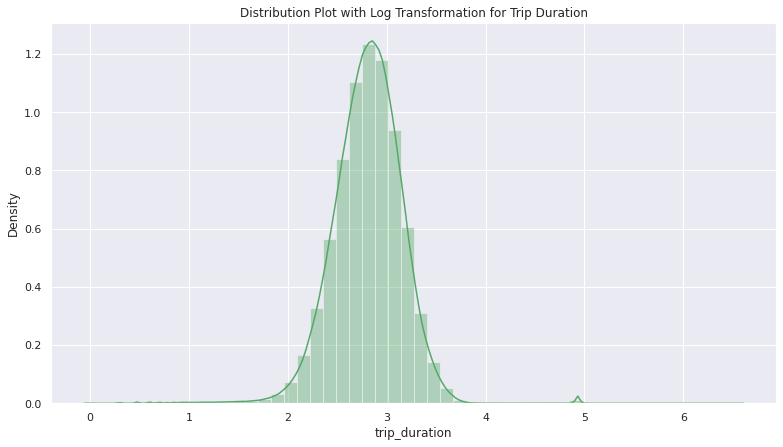

In [83]:
# Analysing distribution of trip duration with the help of np.log10
plt.figure(figsize=(13,7))
sns.distplot(np.log10(dataset['trip_duration']),color="G").set(title='Distribution Plot with Log Transformation for Trip Duration')

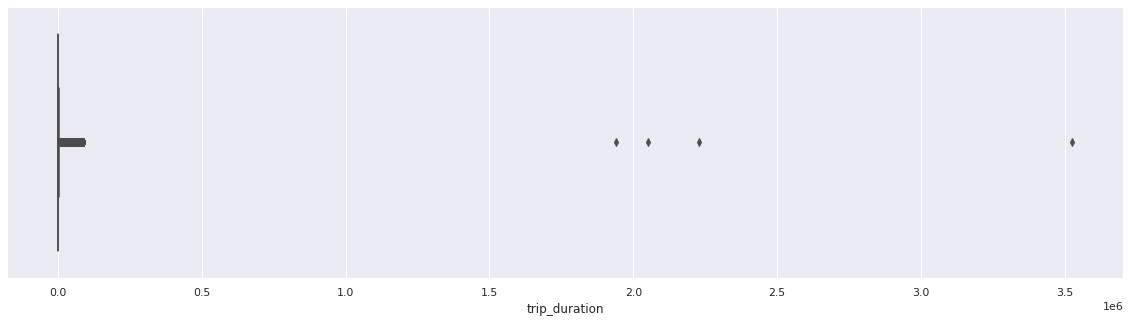

In [84]:
plt.figure(figsize = (20,5))
sns.boxplot(dataset.trip_duration)
plt.show()

From above boxplot and distplot:-


*   Some rides durations are over 100000 seconds which are clearly outliers and should be removed.
*   There are some rides which took 1 sec duration to complete which is 0 km/hr.

*   Major trip durations took between 10-20 mins to complete.








In [85]:
# Understand how many rides completed in different ranges 
dataset['trip_duration'].groupby(pd.cut(dataset['trip_duration'], np.arange(1,max(dataset['trip_duration']),3600))).count()

trip_duration
(1, 3601]             1446313
(3601, 7201]            10045
(7201, 10801]             141
(10801, 14401]             35
(14401, 18001]              5
                       ...   
(3506401, 3510001]          0
(3510001, 3513601]          0
(3513601, 3517201]          0
(3517201, 3520801]          0
(3520801, 3524401]          0
Name: trip_duration, Length: 979, dtype: int64

There are some rides with more than 24 hours of travel duration i.e. 86400 seconds. Which might have occured on weekends for the outstation travels.

In [86]:
# Removing rides over 86400 sec
dataset = dataset[dataset.trip_duration <= 86400]

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

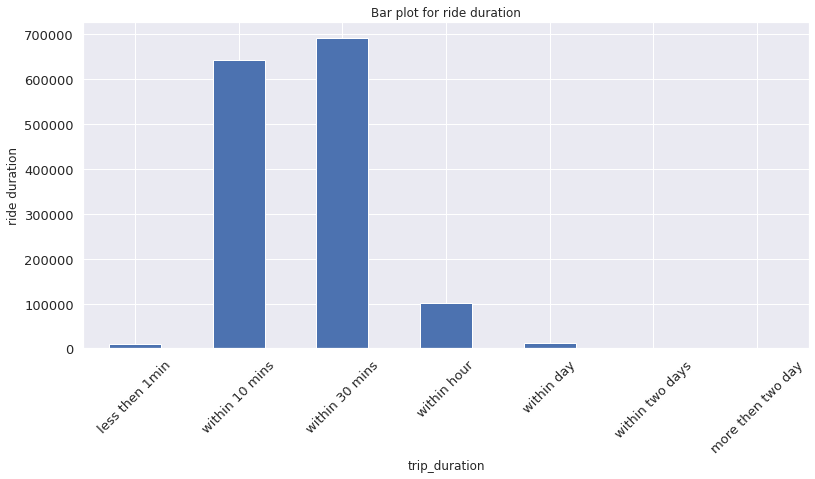

In [87]:
# Lets visualize trip duration with more effective way like range of duration to complete the rides
plt.figure(figsize=[13,6])
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']
dataset.groupby(pd.cut(dataset['trip_duration'],bins=[0,60,600,1800,3600,86400,86400*2,10000000],labels=labels))['trip_duration'].count().plot(kind='bar',fontsize=13)
plt.title("Bar plot for ride duration")
plt.ylabel("ride counts")
plt.ylabel("ride duration")
plt.xticks(rotation=45)

From above bar plot:-

*   Most of the rides completed within 10 to 30 minutes



#### 2. Vendor Id

Here we analyze taxi data only for the 2 vendors which are listed as 1 and 2 in the datset.

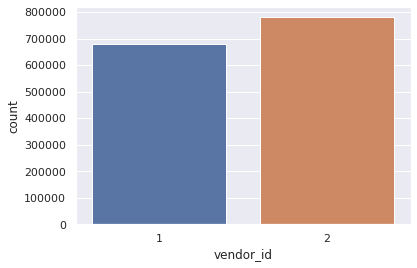

In [88]:
sns.countplot(dataset.vendor_id)
plt.show()


From above countplot we can see that both vendors have good and nearly same market but vendor 2 have more market compare to 1

#### 3. Passenger Count

Here we analyze that how many passenger ride in their single ride.

means during booking of ride how much customer seated in that ride.

New York City Taxi Passenger limit and rule says:


*   A maximum of 4 passengers can ride in traditional cabs, there are also 5 passenger cabs that look more like minivans.
*   A child under 7 is allowed to sit on a passenger's lap in the rear seat in addition to the passenger limit.

*   So, in total we can assume that maximum 6 passenger can board the new york taxi i.e. 5 adult + 1 minor


In [89]:
# Finding how many customer in each ride with the help of value counts
dataset.passenger_count.value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

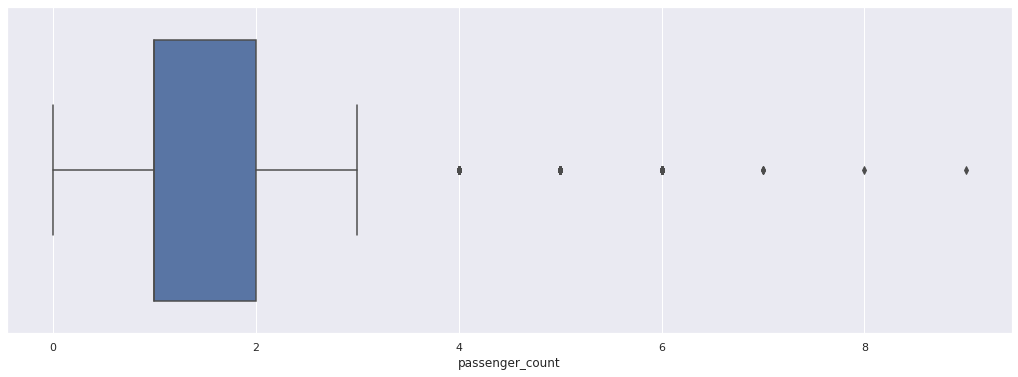

In [90]:
# With the help of box plot we see outlier present  
plt.figure(figsize = (18,6))
sns.boxplot(dataset.passenger_count)
plt.show()


From above boxplot and value counts method we find that:-


*   There are 60 rides with 0 passenger but passenger count is driver entered value and it is common sense passenger without rides not possible so during this rides i think driver forget to enter passenger count so we replace this 0 passenger with 1.
*   There are only 3 rides with 7 passenger, 1 rides with 9 passenger, 1 rides with 8 passenger so this is outlier.

*   So we want to remove this outlier because its affect our further analysis. 
*   Most of the rides done with 1 & 2 passenger.





In [91]:
# Remove the outlier where passenger count greater than 6 removed
dataset = dataset[dataset.passenger_count <= 6]
dataset['passenger_count'].value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
Name: passenger_count, dtype: int64

In [92]:
# Replace 0 passenger with 1
dataset['passenger_count'] = dataset.passenger_count.apply(lambda x: 1 if x == 0 else x)

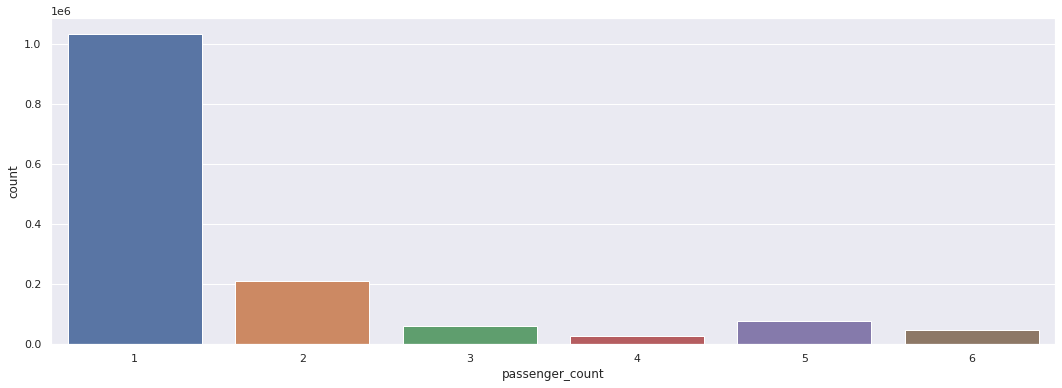

In [93]:
plt.figure(figsize = (18,6))
sns.countplot(dataset.passenger_count)
plt.show()

From above countplot:-


*   Most of the rides are done with 1 passenger
*   Less number of rides done with 3,4,5,6 number of passenger

*   Most of the rides done with 2 passenger after single passenger. 





#### 4. Speed

Here we analyze the speed with different rides.

Speed is function and measure of distance per unit time.

Maximum speed limit in NYC is as follows:

*   25 mph in urban area i.e. 40 km/h
*   65 mph on controlled state highways i.e. approx 104 km/h


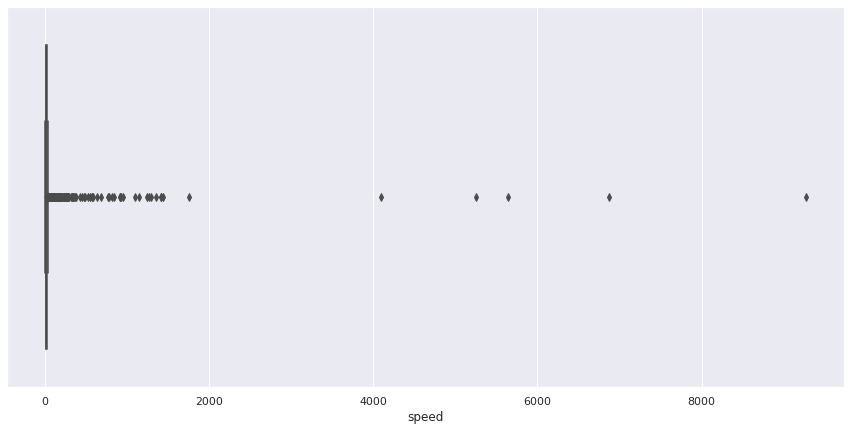

In [94]:
# For detecting outlier with the help of visulaization of boxplot
plt.figure(figsize = (15,7))
sns.boxplot(dataset.speed)
plt.show()

From above boxplot:-

*   Many rides of the speed of taxi over 200 km/hr which clearly shows that outlier. 
*   so we want to remove that over speed and analyse the speed upto 104 km/hr as per speed limit.



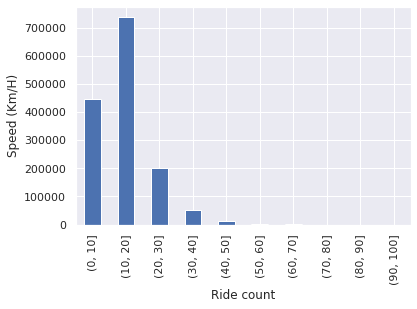

In [95]:
# Analyse the rides with different speeds ranges.
dataset['speed'].groupby(pd.cut(dataset['speed'], np.arange(0,104,10))).count().plot(kind = 'bar')
plt.xlabel('Ride count')
plt.ylabel('Speed (Km/H)')
plt.show()

From above bar plot:-

*   Most of the rides speed have 10 to 20 km/hr
*   Some rides speed between upto 10 km/hr



#### 5. Distance

Now understand the how much distance takes by different rides. by means we see distribution of distance.

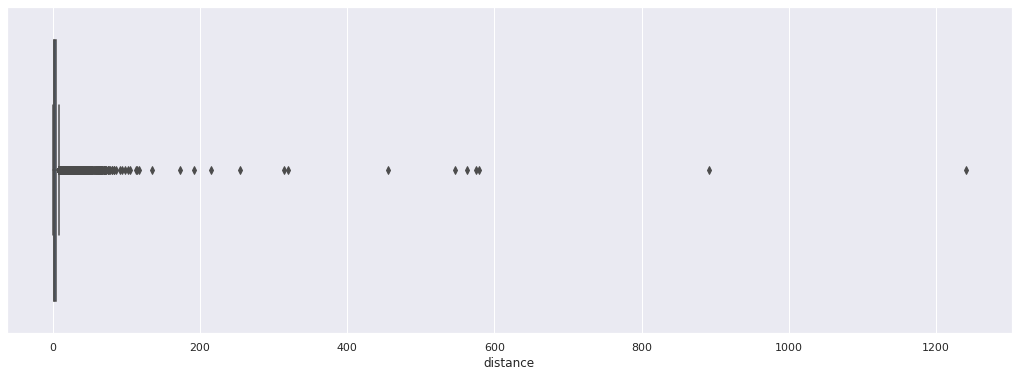

In [96]:
# Check distribution of distance and outlier present in that
plt.figure(figsize = (18,6))
sns.boxplot(dataset.distance)
plt.show()

From above box plot:-

*   There are some rides which is over 100 miles i.e. 160.93 km 
*   There are some rides which is 0 miles i.e. 0 km

So 0 miles i.e. 0 km/hr comes when there are some possible scenario:-

*   Either there are some technical issue that GPS problem, software problem
*   Neither there are some human mind issue like passenger want to cancelled rides just after booking, driver cancelled rides just after accepting.

So we try to find that how many 0 distance rides.

In [97]:
# Find how many 0 distance rides
dataset.distance[dataset['distance']==0].count()

5895

There are 5897 rides which is 0 miles i.e. 0 km

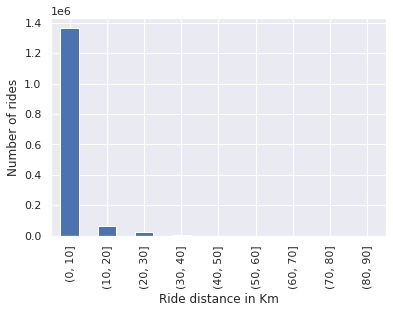

In [98]:
# Find range of distance for different ride
dataset.distance.groupby(pd.cut(dataset.distance, np.arange(0,100,10))).count().plot(kind='bar')
plt.xlabel('Ride distance in Km')
plt.ylabel('Number of rides')
plt.show()

From above bar plot:-

*   Mostly the ride taken between 1 to 10 km.
*   Most of the ride taken between 0 to 30 km.



#### 6. Store and Forward flag

Here we analysis that This the ride record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

([<matplotlib.patches.Wedge at 0x7fe3f4349520>,
 [Text(-1.0998348743846558, 0.019059094608316896, ''),
  Text(1.099834872851148, -0.01905918310157506, '')],
 [Text(-0.5999099314825395, 0.01039586978635467, '99.4%'),
  Text(0.5999099306460807, -0.010395918055404579, '0.6%')])

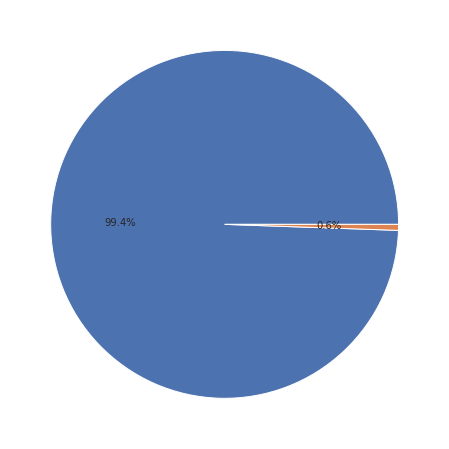

In [99]:
# To know percentage of Y and N
plt.figure(figsize = (18,8))
plt.pie(dataset.store_and_fwd_flag.value_counts(),autopct='%1.1f%%')

Above pie chart:- 


*   shows that only about 0.6% of the ride details were stored in the vehicle first before sending it to the server.

*   shows that 99.4% of the ride details were not stored in the vehicle first before sending it to the server.





In [100]:
# How many values 
dataset.store_and_fwd_flag.value_counts()

N    1450590
Y       8045
Name: store_and_fwd_flag, dtype: int64



*   Its shows that only 8045 ride details were stored in the vehicle first before sending it to the server.
*   shows that 1450599 of the ride details were not stored in the vehicle first before sending it to the server.



#### 7. Total rides Per Hour

Lets analyse the distribution of total rides in 1 hours

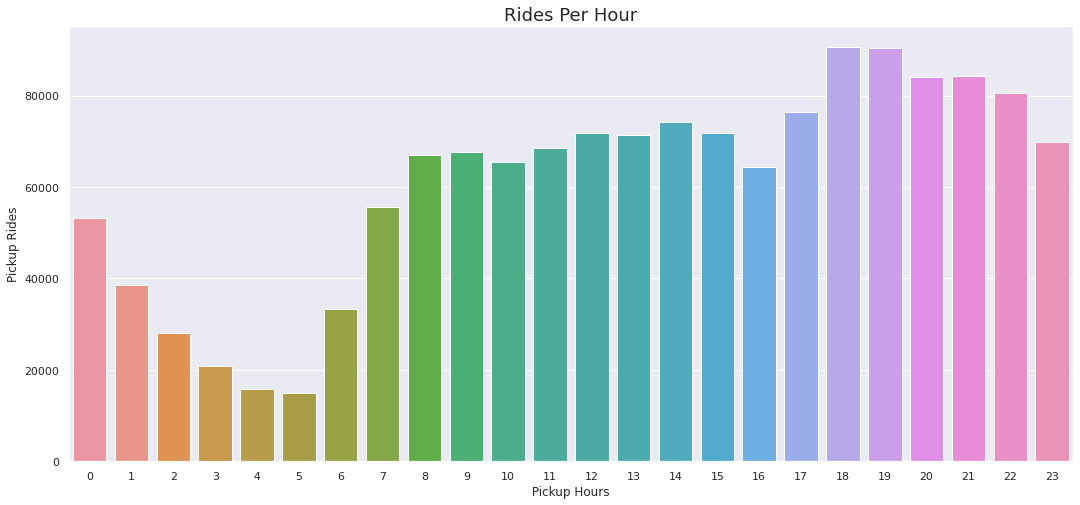

In [101]:
plt.figure(figsize = (18,8))
sns.countplot(dataset.pickup_hour)
plt.xlabel(' Pickup Hours ')
plt.ylabel('Pickup Rides')
plt.title('Rides Per Hour',fontsize = 18)
plt.show()

From above countplot:-

*   It's inline with the general trend of taxi pickups which starts increasing from 6AM in the morning and then declines from late evening i.e. around 8 PM. There is no unusual behavior here.



#### Total rides Per Weekday

Here we analyse the distribution of total rides per weekday.

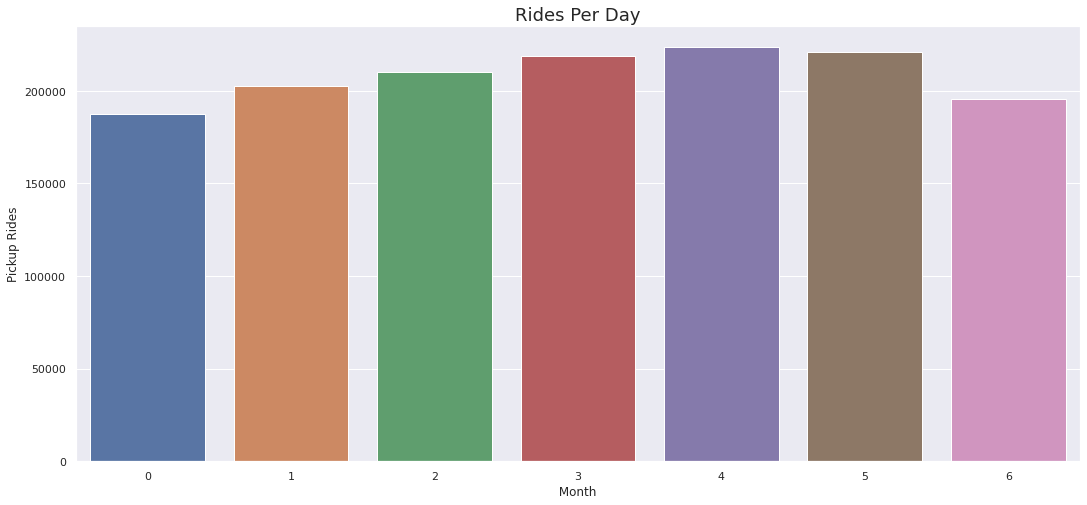

In [102]:
plt.figure(figsize = (18,8))
sns.countplot(dataset.weekday_num)
plt.xlabel(' Month ')
plt.ylabel('Pickup Rides')
plt.title('Rides Per Day',fontsize = 18)
plt.show()

From above countplot:-

*   Here we can see an gradually increasing trend of taxi pickups starting from Monday till Friday. The trend starts declining from saturday till monday which is normal where some office going people likes to stay at home for rest on the weekends.



#### Total rides Per Month

Here we analyse the distribution of total rides per month.

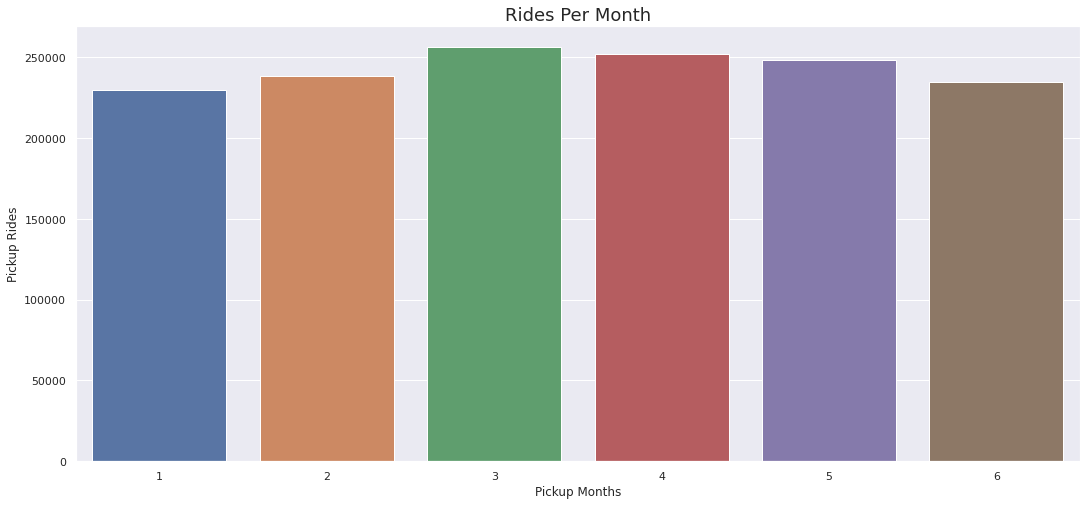

In [103]:
plt.figure(figsize = (18,8))
sns.countplot(dataset.month)
plt.ylabel('Pickup Rides')
plt.xlabel('Pickup Months')
plt.title('Rides Per Month',fontsize = 18)
plt.show()

From above countplot:-

*   Quite a balance across the months here. It could have been more equivalent if we wouldn't have removed the inconsistent records in our study of the univariate analysis



### **2. Bivariate Analysis**

Bivariate analysis is one of the statistical analysis where two variables are observed. 

One variable here is dependent while the other is independent.

here we analyse the changes occured between the two variables and to what extent.

Now Below is some variables which we doing analysis over them:-

#### 1. Trip duration realtionship with (Month, Weekday, Pickup hour, Vendor id)

In [104]:
# Here we creating two dataframe
tb1=pd.DataFrame(dataset.iloc[:,12:15])
tb2=pd.DataFrame(dataset['vendor_id'])

# Concate or murge both dataframe to single dataframe trip_biv
trip_biv=pd.concat([tb1,tb2],axis=1)


In [105]:
# View of trip_biv dataframe
trip_biv

,month,weekday_num,pickup_hour,vendor_id
0,3,0,17,2
1,6,6,0,1
2,1,1,11,2
3,4,2,19,2
4,3,5,13,2
...,...,...,...,...
1458639,4,4,13,2
1458640,1,6,7,1
1458641,4,4,6,2
1458642,1,1,15,1


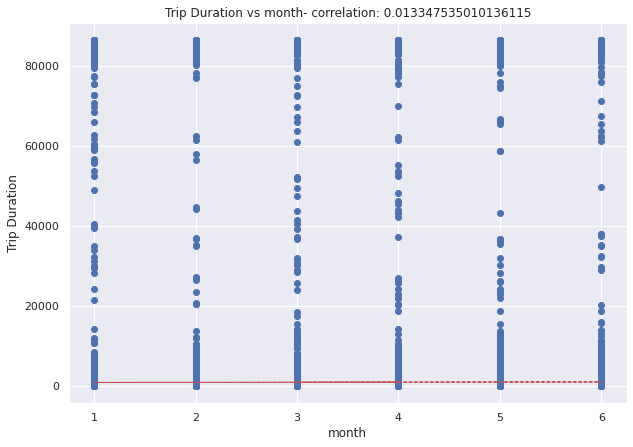

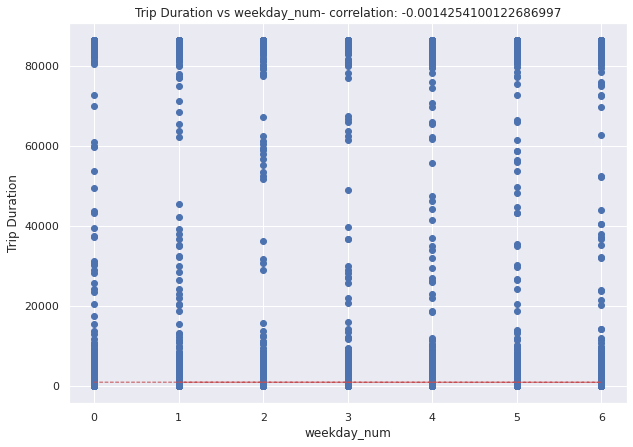

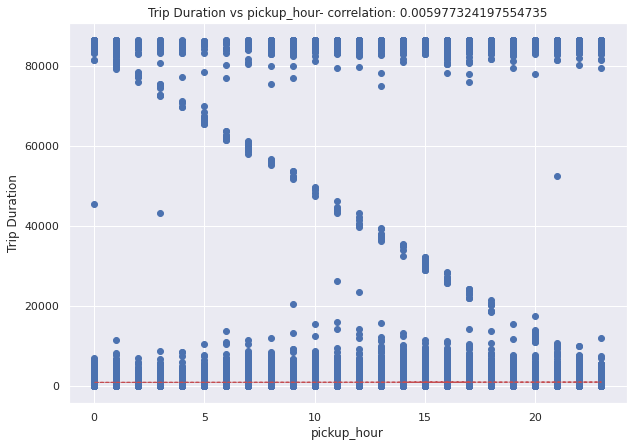

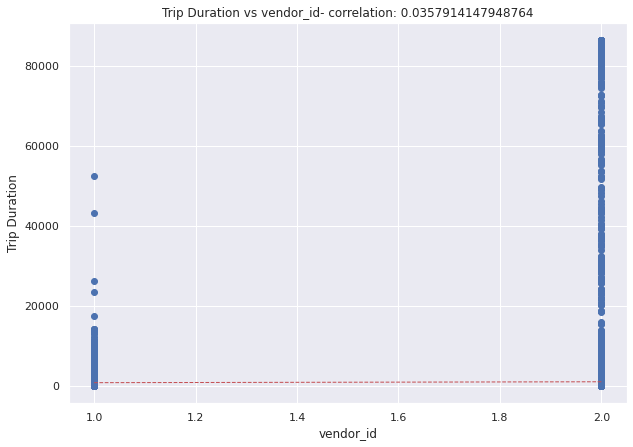

In [106]:
# Here checking trip duration relationship with other variable
for col in trip_biv:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip Duration')
    ax.set_title('Trip Duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['trip_duration'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

From above plot:-


*   Vendor 2 taken more trip duration as compare to 1
*   Above plot we see trip duration correlation with other




##### **Lets analyze Trip duration more intuitive ways with (Month, Weekday, Pickup hour, Vendor id)**

###### 1. Trip duration VS Vendor id

Here we analyze that which vendor have large market by comparing both of them with their average rides duration.

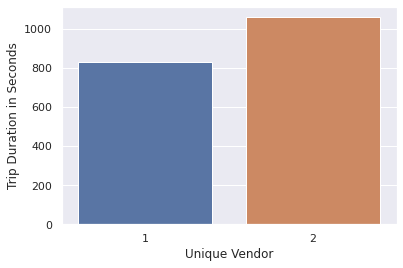

In [107]:
# Correlation between Trip duration & Vendor id using count plot
td_vi = dataset.groupby('vendor_id').trip_duration.mean()
sns.barplot(td_vi.index, td_vi.values)
plt.ylabel('Trip Duration in Seconds')
plt.xlabel('Unique Vendor')
plt.show()

From above barplot:-

*   Vendor id 2 taken more rides duration as compare to 1.
*   Vendor id 1 averagely ride duration approx 200 seconds higher than 1. 



From below we use point plot to better understand trip duration relationship with (Month, Weekday, Pickup hour)

###### 2. Trip Duration VS Hour

We need to aggregate the total trip duration to plot it agaist the month.

So we use point plot to take mean of rides duration to respective month.



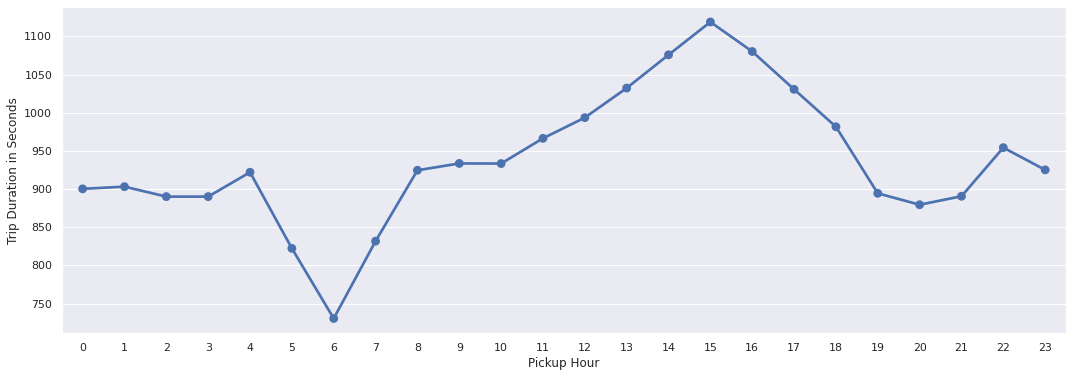

In [108]:
# Using point plot
plt.figure(figsize = (18,6))
td_h = dataset.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(td_h.index, td_h.values)
plt.ylabel('Trip Duration in Seconds')
plt.xlabel('Pickup Hour')
plt.show()

From above point plot:-

*   Average rides duration less at 6 AM when their minimum trafic on roads.
*   Average rides duration high at 3 PM when their maximum trafic on roads.

*   Ride duration on an average is similar during early morning hours i.e. before 6 AM & late evening hours i.e. after 6 PM.


###### 3. Trip Duration VS Weekday

Here we analyze that distribution of Trip duration to different day in week.

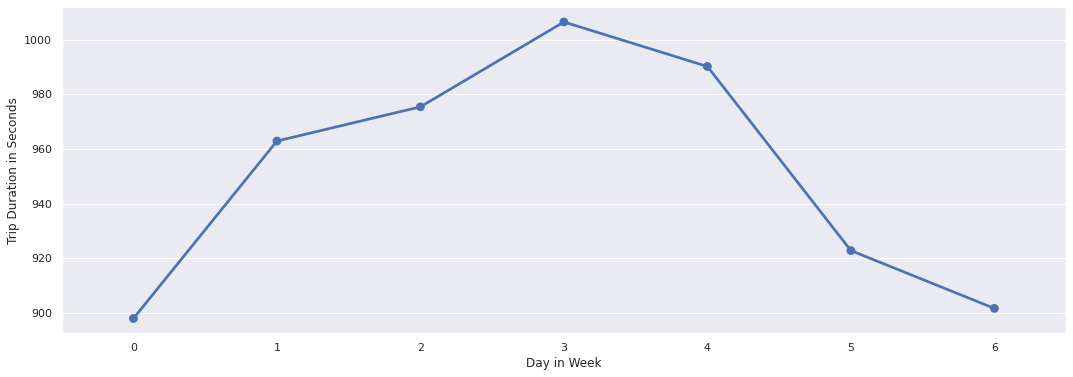

In [109]:
# Using point plot
plt.figure(figsize = (18,6))
td_w = dataset.groupby('weekday_num').trip_duration.mean()
sns.pointplot(td_w.index, td_w.values)
plt.ylabel('Trip Duration in Seconds')
plt.xlabel('Day in Week')
plt.show()

From above point plot:-

*   We can see that ride duration is almost equally distributed across the week on a scale of 0-1000 minutes with minimal difference in the duration times. Also, it is observed that trip duration on thursday is longest among all days.



###### 4. Trip Duration VS Month

Here we analyze that distribution of Trip duration to different months.

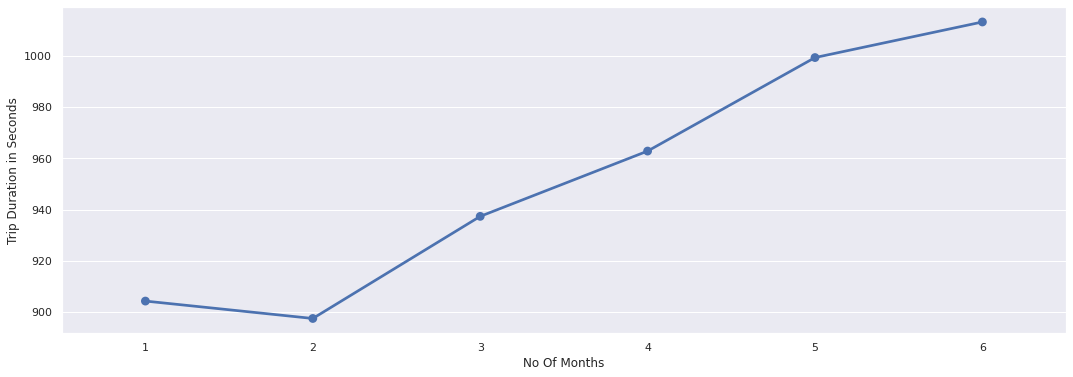

In [110]:
# Using point plot
plt.figure(figsize = (18,6))
td_m = dataset.groupby('month').trip_duration.mean()
sns.pointplot(td_m.index, td_m.values)
plt.ylabel('Trip Duration in Seconds')
plt.xlabel('No Of Months')
plt.show()

From above point plot:-

*   We can see an increasing trend in the average ride duration along with each subsequent month.
*   The duration difference between each month is not much. It has increased gradually over a period of 6 months.

*   It is lowest during february when winters starts declining.
*   There might be some seasonal parameters like wind/rain which can be a factor of this gradual increase in trip duration over a period. Like May is generally the considered as the wettest month in NYC and which is inline with our visualization. As it generally takes longer on the roads due to traffic jams during rainy season. So natually the trip duration would increase towards April May and June.


#### 2. Distance realtionship with (Vendor id, Pickup hour, Weekday, Trip duration)

Here we analysis distance relationship with (Vendor id, Pickup hour, Weekday, Trip duration)

###### 1. Distance VS Vendor Id 

Here we analysis distribution of distance with Vendor id 

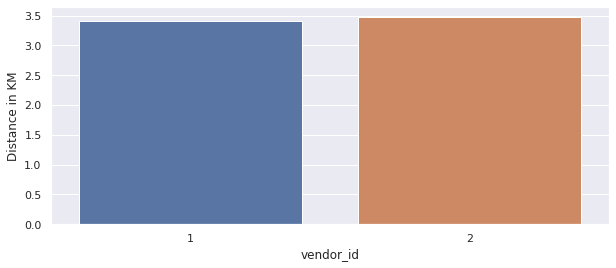

In [111]:
# Using bar plot
plt.figure(figsize = (10,4))
d_v = dataset.groupby('vendor_id').distance.mean()
sns.barplot(d_v.index, d_v.values)
plt.ylabel("Distance in KM")
plt.show()


From above bar plot:-

*   Both vendor 1 & 2 trip distance nearly same



###### 2. Distance VS Hour

Here we analysis distribution of distance with different hours in day

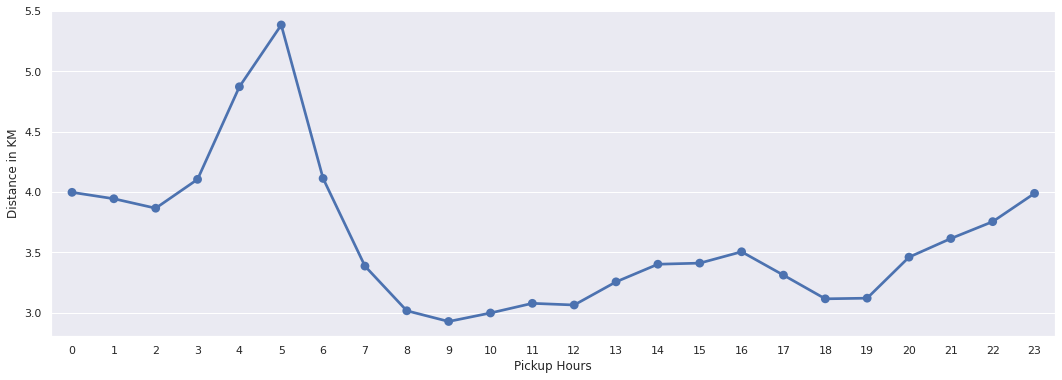

In [112]:
# Using point plot
plt.figure(figsize = (18,6))
d_h = dataset.groupby('pickup_hour').distance.mean()
sns.pointplot(d_h.index, d_h.values)
plt.xlabel('Pickup Hours')
plt.ylabel('Distance in KM')
plt.show()

From above point plot:-

*   trips distance is higher in early morning because:

>   Outstation trips taken during the weekends.

>   Longer trips towards the city airport which is located in the outskirts of the city.



 
*   After early morning distance decreases upto 8 AM and after 8 AM distance nearly equal upto 7 PM in evening which is range between 3 to 3.5 KM. 

*   It starts increasing gradually towards the late night hours starting from evening till 5 AM and decrease steeply towards morning.





###### 3. Distance VS Weekday

Here we analysis average trip distance covered on each day of the week.

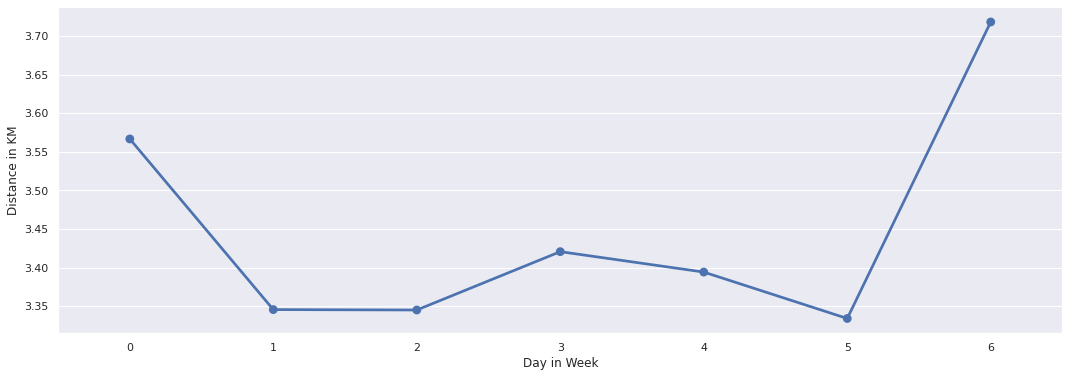

In [113]:
# Using point plot
plt.figure(figsize = (18,6))
d_w = dataset.groupby('weekday_num').distance.mean()
sns.pointplot(d_w.index, d_w.values)
plt.xlabel('Day in Week')
plt.ylabel('Distance in KM')
plt.show()

From above point plot:-

*   So it's a fairly equal distribution with average distance metric verying around 3.5 km/h with Sunday being at the top may be due to outstation trips or night trips towards the airport. 



###### 4.  Distance VS Trip duration

Here we analyze distribution of distance to the trip duration.



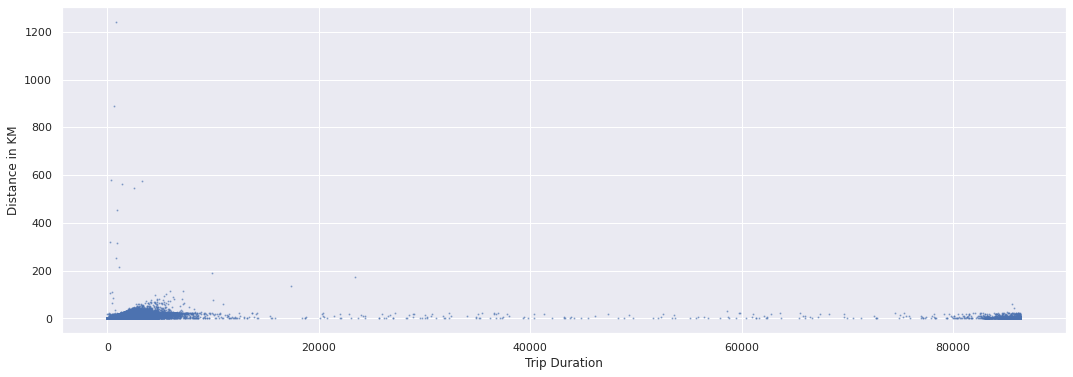

In [114]:
# Using scatter plot
plt.figure(figsize = (18,6))
plt.scatter(dataset.trip_duration, dataset.distance , s=1, alpha=0.5)
plt.xlabel('Trip Duration')
plt.ylabel('Distance in KM')
plt.show()

In [115]:
# Creating new dataframe dist_biv
dist_biv=pd.DataFrame(dataset['trip_duration'])

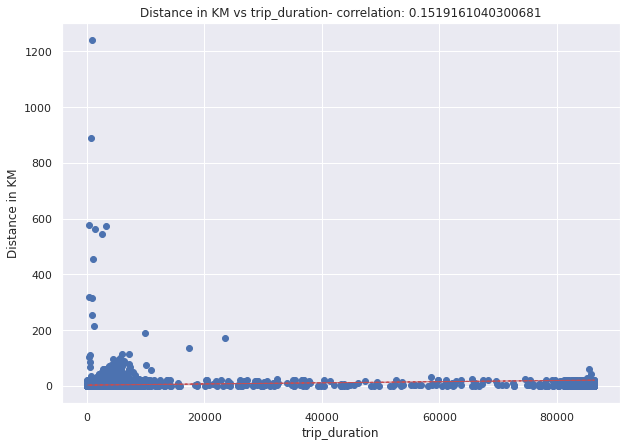

In [116]:
for col in dist_biv:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['distance']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Distance in KM')
    ax.set_title('Distance in KM vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['distance'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

From above plots:-

*   There are very strong relationship between distance and trip duration
*   There were few trips which covered huge distance of approx 200 kms within very less time frame, which is unlikely and should be treated as outliers.

*   There are lots of trips which covered negligible distance but clocked more than 20,000 seconds in terms of the Duration.





#### 3. Speed relationship with (Hour, Weekday)

##### 1. Speed VS Hour

Here we analyze the distribution of speed per hour

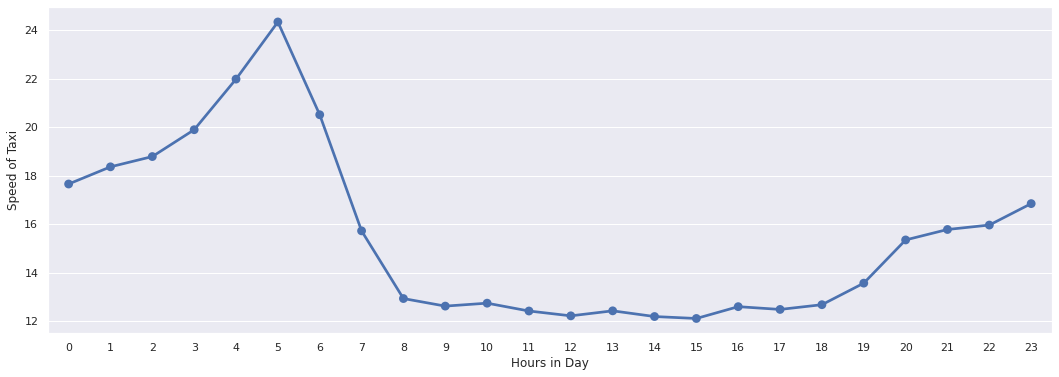

In [117]:
# Using point plot
plt.figure(figsize = (18,6))
s_h = dataset.groupby('pickup_hour').speed.mean()
sns.pointplot(s_h.index, s_h.values)
plt.xlabel('Hours in Day')
plt.ylabel('Speed of Taxi')
plt.show()

From above point plot:-

*   Average speed tend to increase after late evening and continues to increase gradually till the late early morning hours.
*   Average taxi speed is highest at 5 AM in the morning, then it declines steeply as the office hours approaches.

*   Average taxi speed is more or less same during the office hours i.e. from 8 AM till 6PM in the evening.





##### 2. Speed VS Weekday

Here we analyze the distribution of speed per Weekday

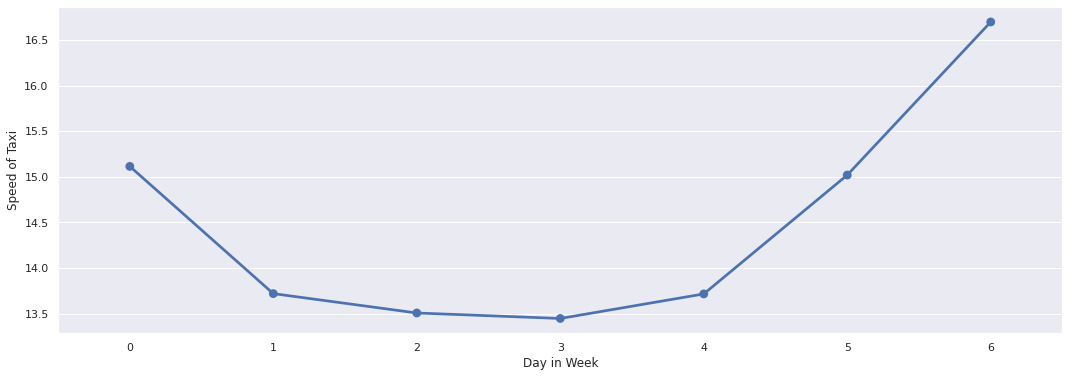

In [118]:
# Using point plot
plt.figure(figsize = (18,6))
s_h = dataset.groupby('weekday_num').speed.mean()
sns.pointplot(s_h.index, s_h.values)
plt.xlabel('Day in Week')
plt.ylabel('Speed of Taxi')
plt.show()

From above point plot:-

*   Average taxi speed is higher on weekend as compared to the weekdays which is obvious when there is mostly rush of office goers and business owners.
*   Even on monday the average taxi speed is shown higher which is quite surprising when it is one of the most busiest day after the weekend.



### **3. Multivariate Analysis**

Multivariate analysis (MVA) involves evaluating multiple variables (more than two) to identify any possible association among them. 



#### 1. Heatmap



What is Heatmap

A heat map is a two-dimensional representation of data in which values are represented by colors. A simple heat map provides an immediate visual summary of information. More elaborate heat maps allow the viewer to understand complex data sets.

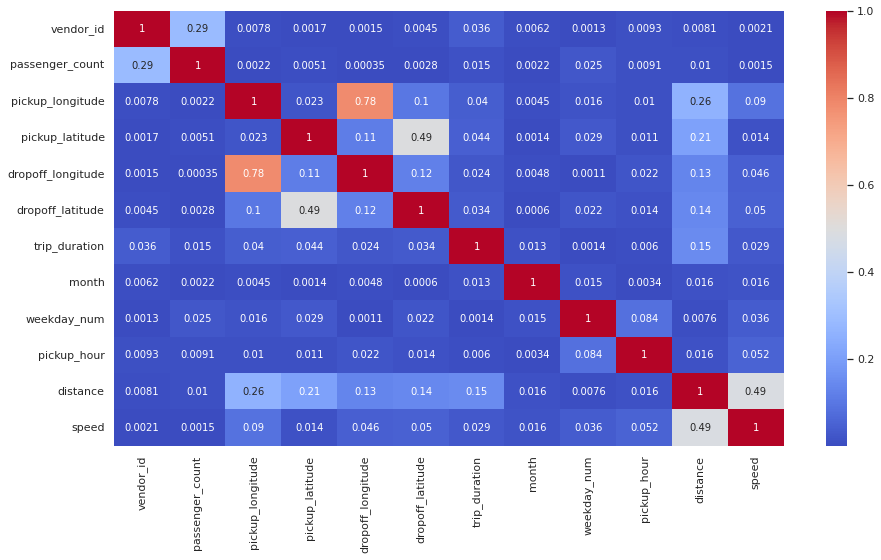

In [119]:
# Using heatmap
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

From above Heatmap:-

*   There are some maximum multicolinearity between

    1. pickhup longitude and dropoff longitude which is = 0.78
    2. pickhup latitude and dropoff latitude which is = 0.49 
    3. distance and speed which is = 0.49
    4. Some combinations of features shows slight correlation


## **5. Hypothesis Testing**

What is Hypothesis Testing:-

Hypothesis Testing is a type of statistical analysis in which you put your assumptions about a population parameter to the test. the theory, methods, and practice of testing a hypothesis by comparing it with the null hypothesis. The null hypothesis is only rejected if its probability falls below a predetermined significance level, in which case the hypothesis being tested is said to have that level of significance.

Below we creating some function parameter which is usefull in hypothesis testing:-

In [ ]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothesis testing - 1

Average trip duration is 1000 seconds for vendor id 1

#### 1. null hypothesis and alternate hypothesis.

Null Hypothesis : N = 1000

Alternate Hypothesis : N < 1000

Test Type : Left Tailed Test

#### 2. Performing statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_2=dataset[(dataset["trip_duration"]==1000)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 2
sample_mean = hypo_2["trip_duration"].mean()
size = len(hypo_2)
std=(variance(hypo_2["trip_duration"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="1000",hypothesis_number=hypothesis_number,df=hypo_2,col="trip_duration")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


I have used t-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected.

we got probability of 0.0 so vendor id have not average trip duration of 1000 seconds thats why we reject them

In [ ]:
mean_median_difference=hypo_2["trip_duration"].mean()- hypo_2["trip_duration"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 0.0


also there are big difference between mean and median

#### 3. Why did we choose the specific statistical test?

NameError: ignored

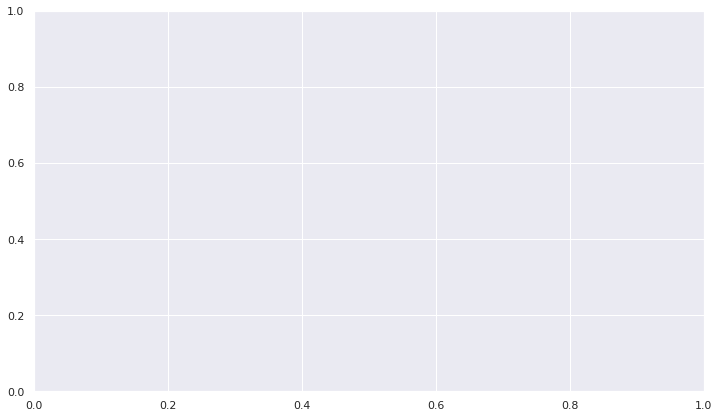

In [ ]:
fig=plt.figure(figsize=(12,7))
ax=fig.gca()
feature= (hypo_2["trip_duration"])
sns.distplot(hypo_2["trip_duration"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('col')
plt.show()

From the above chart we can see median is greater than mean over -173.079. So, the distribution is rightly skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

### 2. Hypithesis Testing - 2

#### 1. null hypothesis and alternate hypothesis.

Null Hypothesis : N = 3 (Wednesday)

Alternate Hypothesis : N !=3

Test Type : right Tailed Test

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1=dataset[(dataset.mean())]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 2
sample_mean = hypo_1["weekday_num"].mean()
size = len(hypo_1)
std=(variance(hypo_1["weekday_num"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="3",hypothesis_number=hypothesis_number,df=hypo_2,col="weekday_num")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


In [ ]:
sample_mean

3.1666666666666665

## **6. Feature Engineering & Data Pre-processing**

Feature engineering is the pre-processing step of machine learning, which is used to transform raw data into features that can be used for creating a predictive model using Machine learning or statistical Modelling. Feature engineering in machine learning aims to improve the performance of models.

Since our dataset do not contain very large number of dimensions. We will first try to use feature selection instead of the feature extraction technique.

### 1. Difference between Feature selection and Feature extraction

**Feature selection:-**

Feature Selection on the other hand is a machine learning technique applied on these (numerical) features.

we select a subset of the original feature set based on the statistical significance of different parameters.

Example: Backward elimination, Forward selection, Recursive feature elimination

**Feature extraction:-**

Feature Extraction transforms an arbitrary data, such as text or images, into numerical features that is understood by machine learning algorithms.

we build a new set of features from the original feature set.

Example: PCA, LDA, Kernel PCA

### 2. Feature selection

Intuition:-

*   We will use backward elimination technique to select the best features to train our model.

*   It displays some statistical metrics with there significance value.

*   Like, It shows the p values for each feature as per its significance in the whole dataset.
*   It also shows the adjusted R squared values to identify whether removing or selecting the feature is beneficial or not.


*   For now we will only look at the P and adjusted R squared value to decide which features to keep and which needed to be removed.





#### 1. Creating dummy variable

what is dummy variable:-

It is an arbitrary mathematical symbol or variable that can be replaced by another without affecting the value of the expression in which it occurs.

It is a numerical variable used in regression analysis to represent subgroups of the sample in your study.

In regression analysis, a dummy variable (also known as indicator variable or just dummy) is one that takes the values 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.

In [21]:
#firstly we do the Dummify all the categorical features like "store_and_fwd_flag, vendor_id, month, weekday_num, pickup_hour, passenger_count" except the label i.e. "trip_duration"

dummy = pd.get_dummies(dataset.store_and_fwd_flag, prefix='flag')
#avoid dummy trap
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
dataset = pd.concat([dataset,dummy], axis = 1)

dummy = pd.get_dummies(dataset.vendor_id, prefix='vendor_id')
#avoid dummy trap
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
dataset = pd.concat([dataset,dummy], axis = 1)

dummy = pd.get_dummies(dataset.month, prefix='month')
#avoid dummy trap
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
dataset = pd.concat([dataset,dummy], axis = 1)

dummy = pd.get_dummies(dataset.weekday_num, prefix='weekday_num')
#avoid dummy trap
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
dataset = pd.concat([dataset,dummy], axis = 1)

dummy = pd.get_dummies(dataset.pickup_hour, prefix='pickup_hour')
#avoid dummy trap
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
dataset = pd.concat([dataset,dummy], axis = 1)

dummy = pd.get_dummies(dataset.passenger_count, prefix='passenger_count')
#avoid dummy trap
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
dataset = pd.concat([dataset,dummy], axis = 1)

In [22]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,1,0,0,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,1,0,0,0,0,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,0,1,0,0,0,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,0,1,0,0,0,0,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0,1,0,0,0,0,0,0,0,0


#### 2. Let's assign the values to X & Y array from the dataset.

In [23]:
# Creating a copy of the dataset for further feature engineering
df=dataset.copy()

In [24]:
#First check the index of the features and label
list(zip( range(0,len(df.columns)),df.columns))

[(0, 'id'),
 (1, 'vendor_id'),
 (2, 'pickup_datetime'),
 (3, 'dropoff_datetime'),
 (4, 'passenger_count'),
 (5, 'pickup_longitude'),
 (6, 'pickup_latitude'),
 (7, 'dropoff_longitude'),
 (8, 'dropoff_latitude'),
 (9, 'store_and_fwd_flag'),
 (10, 'trip_duration'),
 (11, 'weekday'),
 (12, 'month'),
 (13, 'weekday_num'),
 (14, 'pickup_hour'),
 (15, 'distance'),
 (16, 'speed'),
 (17, 'flag_Y'),
 (18, 'vendor_id_2'),
 (19, 'month_2'),
 (20, 'month_3'),
 (21, 'month_4'),
 (22, 'month_5'),
 (23, 'month_6'),
 (24, 'weekday_num_1'),
 (25, 'weekday_num_2'),
 (26, 'weekday_num_3'),
 (27, 'weekday_num_4'),
 (28, 'weekday_num_5'),
 (29, 'weekday_num_6'),
 (30, 'pickup_hour_1'),
 (31, 'pickup_hour_2'),
 (32, 'pickup_hour_3'),
 (33, 'pickup_hour_4'),
 (34, 'pickup_hour_5'),
 (35, 'pickup_hour_6'),
 (36, 'pickup_hour_7'),
 (37, 'pickup_hour_8'),
 (38, 'pickup_hour_9'),
 (39, 'pickup_hour_10'),
 (40, 'pickup_hour_11'),
 (41, 'pickup_hour_12'),
 (42, 'pickup_hour_13'),
 (43, 'pickup_hour_14'),
 (44, 'pic

In [29]:
Y = df.iloc[:,10].values

X = df.iloc[:,range(15,61)].values

Now question is why few features are not assigned to the X array like features at the index 2,3,10 were missed?

Lets assume that:-

*   duration variable assigned to Y because that is the dependent variable.
*   features such as id, timestamp and weekday were not assigned to X array because they are of type object. And we need an array of float data type.

Trick for backward elimination:-

General equation for multiple linear regression is like

        Y = a0 + a1x1 + a2x2 + ... + anxn


Since, we dont have x0 in our X array so the regressor won't consider the constant value of the equation i.e. a0. So to make it count in the equation we will append the selected feature set with a contant series of 1's as a first column. To make it appear like below equation to the statsmodel.

        y = a0x0 + a1x1 + a2x2 + ... + anxn

In [30]:
X.shape

(1458644, 46)

In [31]:
# Let's append 1458644 rows of 1's as the first column in the X array
X1 = np.append(arr = np.ones((X.shape[0],1)).astype(int), values = X, axis = 1)
X1.shape

(1458644, 47)

There we go, our feature set is now ready for the feature selection model with 1s in the first column for a0 constant.

Let's fit stats model on the X array to figure out an optimal set of features by recursively checking for the highest p value and removing the feature of that index.

Here we will take the level of significance as 0.05 i.e. 5% which means that we will reject feature from the list of array and re-run the model till p value for all the features goes below .05 to find out the optimal combination for our model.



In [32]:
#Select all the features in X array
X_opt = X1[:,range(0,46)]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()

#Fetch p values for each feature
p_Vals = regressor_OLS.pvalues

#define significance level for accepting the feature.
sig_Level = 0.05

#Loop to iterate over features and remove the feature with p value less than the sig_level
while max(p_Vals) > sig_Level:
    print("Probability values of each feature \n")
    print(p_Vals)
    X_opt = np.delete(X_opt, np.argmax(p_Vals), axis = 1)
    print("\n")
    print("Feature at index {} is removed \n".format(str(np.argmax(p_Vals))))
    print(str(X_opt.shape[1]-1) + " dimensions remaining now... \n")
    regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
    p_Vals = regressor_OLS.pvalues
    print("=================================================================\n")
    
#Print final summary
print("Final stat summary with optimal {} features".format(str(X_opt.shape[1]-1)))
regressor_OLS.summary()

Probability values of each feature 

[1.10746936e-002 0.00000000e+000 0.00000000e+000 9.68103956e-001
 3.90406640e-108 7.63656654e-001 9.62608418e-001 2.61814546e-001
 1.21237518e-002 1.05183138e-003 7.14565444e-007 2.45758471e-005
 9.83647608e-008 2.26966030e-007 3.76503049e-007 2.68811164e-001
 9.85903377e-001 6.81711561e-001 7.70603578e-001 6.28604631e-001
 3.52248313e-003 5.01291190e-002 5.57667656e-002 6.91375063e-001
 3.74768701e-001 5.46116266e-001 3.29409236e-001 6.87999006e-002
 2.05262772e-002 5.42883549e-003 3.84379671e-005 7.33794379e-003
 4.71587624e-002 1.08410327e-001 5.38780849e-001 2.00133738e-001
 1.62760871e-001 1.20566049e-002 1.79415669e-001 1.00649017e-001
 1.03696763e-001 1.12146123e-001 1.17022752e-001 1.05590029e-001
 1.06330173e-001 5.20846372e-001]


Feature at index 16 is removed 

44 dimensions remaining now... 


Probability values of each feature 

[1.10641307e-002 0.00000000e+000 0.00000000e+000 9.68093143e-001
 3.89440588e-108 7.63618842e-001 9.62580641

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1005.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:41:58   Log-Likelihood:            -1.4550e+07
No. Observations:             1458644   AIC:                         2.910e+07
Df Residuals:                 1458621   BIC:                         2.910e+07
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        642.2426     12.041     53.338      0.000     618.643     665.843
x1           164.8220      1.148    143.630      0.000     162.573     167.071
x2           -28.9725      0.332    -87.332      0.000     -29.623     -28.322
x3           203.8606      8.631     23.621      0.000     186.945     220.776
x4            32.1097     11.697      2.745      0.006       9.184      55.035
x5            44.0644     11.974      3.680      0.000      20.596      67.533
x6            73.9658     14.315      5.167      0.000      45.909     102.022
x7            60.7654     14.167      4.289      0.000      32.998      88.533
x8            78.0896     13.997      5.579      0.000      50.655     105.524
x9            75.0618     13.885      5.406      0.000      47.848     102.276
x10           74.1684     13.917      5.329      0.000      46.892     101.445
x11         -168.7635     43.032     -3.922      0.000    -253.105     -84.422
x12         -101.6475     29.312     -3.468      0.001    -159.099     -44.196
x13          -91.0567     23.014     -3.957      0.000    -136.163     -45.950
x14           40.8467     20.470      1.995      0.046       0.725      80.968
x15           53.9859     20.123      2.683      0.007      14.546      93.426
x16           94.3189     20.434      4.616      0.000      54.270     134.368
x17           53.6104     21.478      2.496      0.013      11.515      95.706
x18          -46.0098     18.444     -2.495      0.013     -82.159      -9.861
x19          -65.3320     19.044     -3.431      0.001    -102.658     -28.006
x20          -68.4386     19.038     -3.595      0.000    -105.753     -31.124
x21           45.2142     19.424      2.328      0.020       7.144      83.285
x22          -67.7949     20.730     -3.270      0.001    -108.425     -27.165
================================================================================
Omnibus:                  8330196.946   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2368102451061102.500
Skew:                         350.196   Prob(JB):                           0.00
Kurtosis:                  197394.513   Cond. No.                           213.
================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From above:-



*   we finally reached the combination of optimum features with each feature having p value < 0.05.



#### 3. Split Data

So here we divide our data in two divison:-

1. train split
2. test split

The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications. This method is a fast and easy procedure to perform such that we can compare our own machine learning model results to machine results.

Before training our model on the dataset, we need to split the dataset into training and testing datasets. This is required to train our model on the major part of our dataset and test the accuracy of the model on the minor part. Let's split it.

In [33]:
#Split raw data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=4)

#Split data from the feature selection group
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_opt,Y, test_size=0.2, random_state=4)

From above train test split:-


*   This will divide our dataset randomly with a ratio of 80/20 where training set consists of more than 1 million records and test dataset with more than .35 million records. Let's train our model on the training set now.



### 3. Feature Extraction

We will use PCA for feature extraction i.e. Principal Component Analysis. It is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

#### 1. Split Data

In [34]:
# Lets split our data first before scaling the features
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X,Y,test_size=0.2, random_state=4)

#### 2. Scale Data

So here we scale the input varibles first before applying PCA to standardise the variance and avoid the bias. Lets Scale the data using StandardScaler.

Why we use scaler:-

So if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower.

In [35]:
# Applying Standard scaler
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

#### 3. PCA Application

Let's apply PCA technique on the training features to understand how many principal components should we select for our model to capture atleast 90% variance. For that we will take help of plot and cumsum function of numpy package.

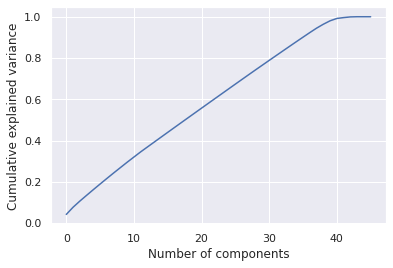

In [36]:
pca = PCA().fit(X_train_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [37]:
arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
list(zip(range(1,len(arr)), arr))

[(1, 4.21),
 (2, 7.68),
 (3, 10.65),
 (4, 13.450000000000001),
 (5, 16.220000000000002),
 (6, 18.94),
 (7, 21.630000000000003),
 (8, 24.290000000000003),
 (9, 26.900000000000002),
 (10, 29.500000000000004),
 (11, 32.02),
 (12, 34.53),
 (13, 36.9),
 (14, 39.269999999999996),
 (15, 41.629999999999995),
 (16, 43.989999999999995),
 (17, 46.339999999999996),
 (18, 48.69),
 (19, 51.03),
 (20, 53.370000000000005),
 (21, 55.71000000000001),
 (22, 58.05000000000001),
 (23, 60.38000000000001),
 (24, 62.71000000000001),
 (25, 65.04),
 (26, 67.36),
 (27, 69.67999999999999),
 (28, 71.99),
 (29, 74.28999999999999),
 (30, 76.57),
 (31, 78.85),
 (32, 81.11999999999999),
 (33, 83.38),
 (34, 85.64),
 (35, 87.89),
 (36, 90.11),
 (37, 92.32),
 (38, 94.47),
 (39, 96.37),
 (40, 98.04),
 (41, 99.17),
 (42, 99.59),
 (43, 99.92),
 (44, 100.0),
 (45, 100.0)]

From above we can see that almost 40 variables are needed for capturing atleast 99% of the variance in the training dataset. Hence we will use the same set of variables.

In [38]:
# Apply PCA on the training and the test dataset
pca_10 = PCA(n_components=40)
X_train_pca = pca_10.fit_transform(X_train_pca)
X_test_pca = pca_10.transform(X_test_pca)

#### 4. Correlation of Feature extraction

Lets analyze Correlation between features of the Feature extraction using Heatmap

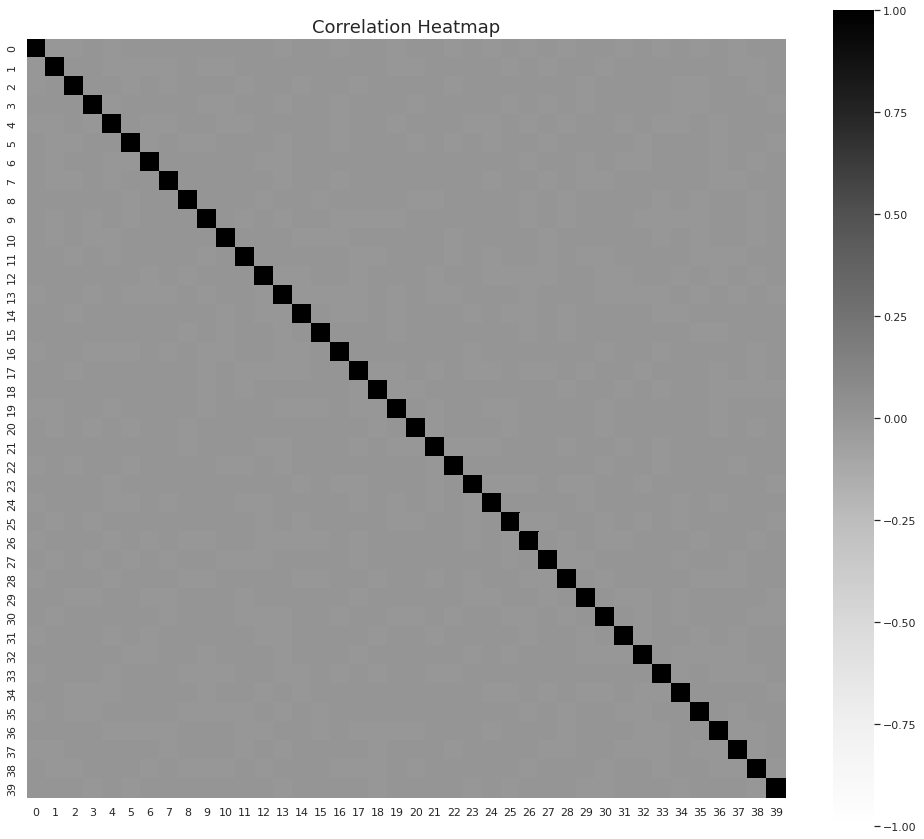

In [39]:
plt.figure(figsize=(17,15))
corr = pd.DataFrame(X_train_pca).corr()
corr.index = pd.DataFrame(X_train_pca).columns
sns.heatmap(corr, cmap='Greys',square=True, vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

From above heatmap:-


*   All of the features shows NO correlation at all. Because feature extraction removes all collinearity.

Let's move on to the  ML Model implementation.




## **7. ML Model Implementation**

What is model in machine learning:-

*   A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.

*   We need a model to train on our dataset to serve our purpose of prediciting the NYC taxi trip duration given the other features as training and test set. Since our dependent variable contains continous values so we will use regression technique to predict our output.





### ML Model 1 - **Multiple Linear Regression**


Why we use Multiple Linear Regression:-

*   It is used to estimate the relationship between one continuous dependent variable and two or more independent variables.

Model training:-


*   We will first try with the default instantiation of the regressor object without using any generalization parameter. We will also not perform any scaling of the features because linear regression model takes care of that inherently. This is a plus point to use Linear regression model.
*   It is quite fast to train even on very large datasets. So considering the size of our dataset this seems to be the correct approach as of now. Let's see how it performs.

#### Model fitting

In [40]:
# Linear regressor for the raw data
# Instance the linear regression object
regressor = LinearRegression()          
# Fit the Algorithm
regressor.fit(X_train,y_train) 

LinearRegression()

In [41]:
# Linear regressor for the Feature selection group
# Instance the linear regression object
regressor1 = LinearRegression()
# Fit the Algorithm         
regressor1.fit(X_train_fs,y_train_fs)   

LinearRegression()

In [42]:
# Linear regressor for the Feature extraction group
# Instance the linear regression object
regressor2 = LinearRegression()
# Fit the Algorithm 
regressor2.fit(X_train_pca,y_train_pca) 

LinearRegression()

#### Coefficients

In [43]:
# Checking the coefficients
regressor.coef_

array([ 1.59829748e+02, -2.56798127e+01, -1.80834059e+00,  1.98038714e+02,
        2.04794990e+00,  6.80670202e+00,  1.45296294e+01,  3.38070465e+01,
        4.91666407e+01,  8.98240854e+01,  7.59359238e+01,  9.04099445e+01,
        9.09344657e+01,  7.80675996e+01,  1.51289462e+01, -1.23094572e+01,
        1.58324791e+00,  8.31179879e-01, -5.51028663e+01, -1.69592859e+02,
       -7.19025766e+01, -6.29372176e+01,  2.57006670e+01,  2.36995541e+01,
        3.42282840e+01,  3.79304237e+01,  7.42801791e+01,  8.46887966e+01,
        1.02069670e+02,  1.25903776e+02,  9.15088896e+01,  5.93551226e+01,
        5.46170620e+01, -1.75828047e+01, -4.46988398e+01, -4.08029474e+01,
        5.52011492e+01, -4.36614257e+01, -1.31152450e+03, -1.30982854e+03,
       -1.27696540e+03, -1.25336727e+03, -1.29097787e+03, -1.27591113e+03,
       -2.18370246e+03,  0.00000000e+00])

In [44]:
# Checking the coefficients
regressor1.coef_

array([   0.        ,  159.82022606,  -25.79146244,  203.2850168 ,
         27.57165152,   42.61153152,   84.85181801,   70.54621058,
         84.59348128,   83.86723346,   69.5201848 , -201.72379933,
       -106.15473205,  -97.71548551,   51.76930505,   69.15611377,
         92.79819803,   58.61997937,  -50.77390978,  -77.63340413,
        -73.7156404 ,   22.5425793 ,  -75.82997649])

In [45]:
# Checking the coefficients
regressor2.coef_

array([ 57.83165588, 136.23845078,  91.45749673,   7.89948678,
        23.12145975,   8.63839661, -22.34576436, -20.52243776,
       -10.85253709,  16.28215715,   1.60510012,   1.46328245,
       -19.25647503,  20.02111252, -35.32975124, -11.9894534 ,
        57.36521841, -22.968543  , -14.05420366,  -1.36798783,
        -6.81575869, -12.29970023, -14.7186993 , -19.0374423 ,
         5.86869629,  -7.58829379, -35.35507641,   7.97855611,
        52.81154897,  -8.18317388,  -5.48375773,  11.05012579,
        57.9302064 ,  10.15954703,  -3.7097377 ,  -1.35073235,
        62.10488307, 158.06061492, -31.13646905, -85.80282538])

#### Intercept

In [46]:
# Checking the intercept value
regressor.intercept_

1873.9816971623868

In [47]:
# Checking the intercept value
regressor1.intercept_

612.1778015788686

In [48]:
# Checking the intercept value
regressor2.intercept_

958.9814373797561

#### Prediction

##### 1. Raw data

In [49]:
# Predict on the model train features of raw data
y_pred1 = regressor.predict(X_train)
y_pred1

array([ 466.51239078,  930.54838631, -116.57038386, ..., 1926.32765656,
       1818.47071997, 1038.73209967])

In [50]:
# Predict on the model test features of raw data
y_pred = regressor.predict(X_test)
y_pred


array([ 611.67498094,  464.08624089,  837.57114725, ...,  728.69900265,
       1409.05346271, 1179.03081436])

##### 2. Feature selection

In [51]:
# Predict on the model train features of Feature Selection group
y_pred_fs1 = regressor1.predict(X_train_fs)
y_pred_fs1

array([ 459.76715526,  946.34593782, -132.8365256 , ..., 1914.76979943,
       1798.063359  , 1031.63803792])

In [52]:
# Predict on the model test features of Feature Selection group
y_pred_fs = regressor1.predict(X_test_fs)
y_pred_fs

array([ 619.23424024,  465.12334846,  775.84635563, ...,  702.19368651,
       1382.18330377, 1194.68847575])

##### 3. Feature extraction

In [53]:
# Predict on the model train features of Feature Extraction group
y_pred_pca1 = regressor2.predict(X_train_pca)
y_pred_pca1

array([ 574.73350621, 1201.19588516, 1316.42232973, ...,  942.73506395,
       1616.51761471,  902.99957723])

In [54]:
# Predict on the model test features of Feature Extraction group
y_pred_pca = regressor2.predict(X_test_pca)
y_pred_pca

array([ 910.28530596,  917.40002114, 1153.17001876, ...,  966.31402299,
       1119.23366241, 1209.4591355 ])

#### Evaluation metrics

##### 1. Raw data

In [55]:
# Evaluation matrix for train raw data
MSE=round(mean_squared_error(y_train,y_pred1),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_train,y_pred1))
Adjusted_R2=(1-(1-r2_score(y_train, y_pred1))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

MSE : 27718715.1775 RMSE : 5264.85661509409
R2 : 0.014050635546140167 Adjusted R2 : 0.014011767678682285


In [56]:
# Evaluation matrix for test raw data
MSE=round(mean_squared_error(y_test,y_pred),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test,y_pred))
Adjusted_R2=(1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

MSE : 24236982.5773 RMSE : 4923.10700445359
R2 : 0.01868345133146121 Adjusted R2 : 0.018528691828856525


##### 2. Feature selection

In [57]:
# Evaluation matrix for train feature selection group
MSE=round(mean_squared_error(y_train_fs,y_pred_fs1),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_train_fs,y_pred_fs1))
Adjusted_R2=(1-(1-r2_score(y_train_fs, y_pred_fs1))*((X_train_fs.shape[0]-1)/(X_train_fs.shape[0]-X_train_fs.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)


MSE : 27719319.3927 RMSE : 5264.91399670498
R2 : 0.01402914372798214 Adjusted R2 : 0.014009709753691202


In [58]:
# Evaluation matrix for test feature selection group
MSE=round(mean_squared_error(y_test_fs,y_pred_fs),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_fs,y_pred_fs))
Adjusted_R2=(1-(1-r2_score(y_test_fs, y_pred_fs))*((X_test_fs.shape[0]-1)/(X_test_fs.shape[0]-X_test_fs.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)



MSE : 24236180.7605 RMSE : 4923.0255697589055
R2 : 0.018715915606665745 Adjusted R2 : 0.018638544516211275


##### 3. Feature extraction

In [59]:
# Evaluation matrix for train feature extraction group
MSE=round(mean_squared_error(y_train_pca,y_pred_pca1),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_train_pca,y_pred_pca1))
Adjusted_R2=(1-(1-r2_score(y_train_pca, y_pred_pca1))*((X_train_pca.shape[0]-1)/(X_train_pca.shape[0]-X_train_pca.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)


MSE : 28014979.0981 RMSE : 5292.917824612432
R2 : 0.0035125849056595326 Adjusted R2 : 0.00347842569343626


In [60]:
# Evaluation matrix for test feature extraction group
MSE=round(mean_squared_error(y_test_pca,y_pred_pca),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_pca,y_pred_pca))
Adjusted_R2=(1-(1-r2_score(y_test_pca, y_pred_pca))*((X_test_pca.shape[0]-1)/(X_test_pca.shape[0]-X_test_pca.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)


MSE : 24579801.3035 RMSE : 4957.802063767774
R2 : 0.0048032709837947385 Adjusted R2 : 0.004666796843066923


#### Visualizing evaluation Metric Score chart

##### 1. Raw data

Text(0.5, 1.0, 'Actual and Predicted Time Duration')

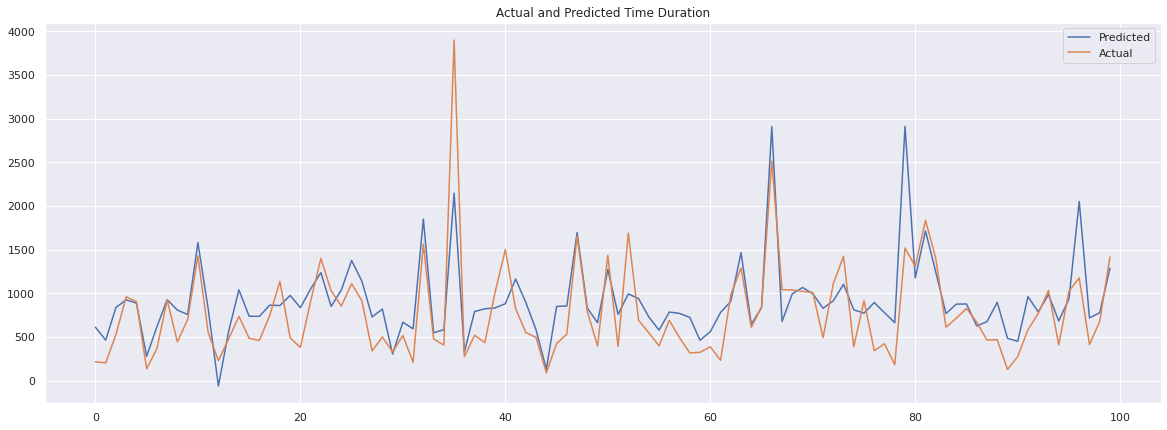

In [61]:
# Plotting Actual and Predicted Values for test raw data
plt.figure(figsize=(20,7))
plt.plot((y_pred)[:100]) 
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

##### 2. Feature selection

Text(0.5, 1.0, 'Actual and Predicted Time Duration')

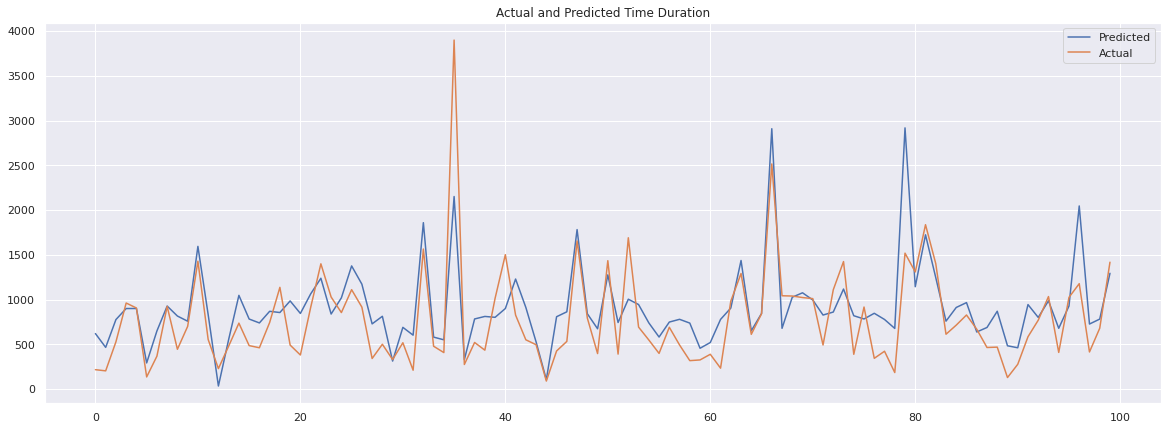

In [62]:
# Plotting Actual and Predicted Values for test Feature selection
plt.figure(figsize=(20,7))
plt.plot((y_pred_fs)[:100]) 
plt.plot((np.array(y_test_fs)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

##### 3. Feature extraction

Text(0.5, 1.0, 'Actual and Predicted Time Duration')

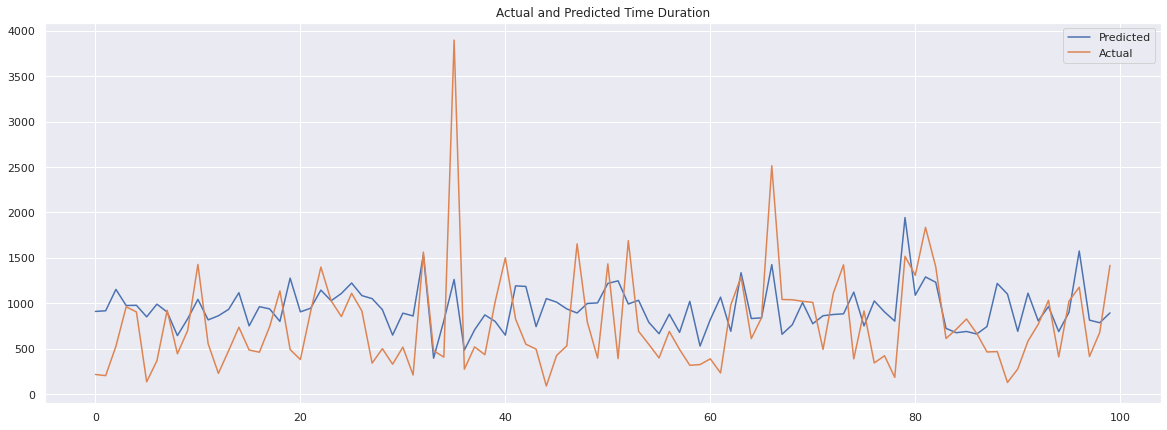

In [63]:
# Plotting Actual and Predicted Values for test Feature extraction
plt.figure(figsize=(20,7))
plt.plot((y_pred_pca)[:100]) 
plt.plot((np.array(y_test_pca)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

#### From above 3 groups of data Evaluation & visualization matrix:-



*   We can see that Very poor Root mean squared value for both train and test data for 3 groups.

    For training raw data RMSE=5264.5866

    For training Feature Selection data RMSE=5264.9139

    For training Feature Extraction data RMSE=5292.9178

    For testing raw data RMSE=4923.1070

    For testing Feature Selection data RMSE=4923.0255

    For testing Feature Extraction data RMSE=4957.8020
*   We can see that very poor Adjusted R-squared value for both train and test data for 3 groups.

    For training raw data Adjusted R2 = 0.0140

    For training Feature Selection data Adjusted R2 = 0.0140

    For training Feature Extraction data Adjusted R2 = 0.0034

    For testing raw data Adjusted R2 = 0.0185

    For testing Feature Selection data Adjusted R2 = 0.0186

    For testing Feature Extraction data Adjusted R2 = 0.0046

Also we can see visualization graph their big difference between actual and predicted value




###  ML Model 2 - **Regularization Lasso Regression**

What is regularization:-

It is a techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.

Here we use Lasso Regression:-

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

#### Model fitting

In [64]:
# Regularize Lasso Regression for the raw data
# Instance the Regularize Lasso Regression object
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
# Fit the Algorithm
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [65]:
# Regularize Lasso Regression for the Feature selection data
# Instance the Regularize Lasso Regression object
lasso1  = Lasso(alpha=0.0001 , max_iter= 3000)
# Fit the Algorithm
lasso1.fit(X_train_fs, y_train_fs)

Lasso(alpha=0.0001, max_iter=3000)

In [66]:
# Regularize Lasso Regression for the Feature extraction data
# Instance the Regularize Lasso Regression object
lasso2  = Lasso(alpha=0.0001 , max_iter= 3000)
# Fit the Algorithm
lasso2.fit(X_train_pca, y_train_pca)

Lasso(alpha=0.0001, max_iter=3000)

#### Coefficients

In [67]:
# Checking the coefficients raw data
lasso.coef_

array([ 1.59825843e+02, -2.56805865e+01, -1.45271903e+00,  1.98042064e+02,
        2.03513106e+00,  6.78925060e+00,  1.45026980e+01,  3.37927459e+01,
        4.91379409e+01,  8.97956305e+01,  7.59162504e+01,  9.03933175e+01,
        9.09399059e+01,  7.80632046e+01,  1.51394030e+01, -1.22191990e+01,
        1.48919819e+00,  7.82813678e-01, -5.50549740e+01, -1.69397972e+02,
       -7.19488960e+01, -6.30199223e+01,  2.56232617e+01,  2.36207129e+01,
        3.41336350e+01,  3.78508024e+01,  7.42128887e+01,  8.45956225e+01,
        1.01989924e+02,  1.25824197e+02,  9.14608998e+01,  5.92875370e+01,
        5.45354212e+01, -1.76171099e+01, -4.47487540e+01, -4.08628249e+01,
        5.51381156e+01, -4.36872268e+01, -5.39561639e+02, -5.37885624e+02,
       -5.05027005e+02, -4.81429137e+02, -5.19046877e+02, -5.03983609e+02,
       -1.35342860e+03,  0.00000000e+00])

In [71]:
# Checking the coefficients Feature selection data
lasso1.coef_

array([   0.        ,  159.82022597,  -25.79147853,  203.2846177 ,
         27.57064379,   42.6106113 ,   84.84894813,   70.54334395,
         84.5906227 ,   83.86438188,   69.51759242, -201.7133842 ,
       -106.14962912,  -97.712145  ,   51.76769775,   69.15457357,
         92.79656685,   58.61808146,  -50.77175696,  -77.63109551,
        -73.71329492,   22.54142949,  -75.82714527])

In [70]:
# Checking the coefficients Feature extraction data
lasso2.coef_

array([ 57.83160313, 136.23838677,  91.45742199,   7.89940731,
        23.1213795 ,   8.63831494, -22.34568176, -20.52235419,
       -10.85245192,  16.28207169,   1.60501188,   1.46319389,
       -19.2563812 ,  20.02101862, -35.32965727, -11.98935915,
        57.36512401, -22.96844843, -14.05410889,  -1.36789285,
        -6.81566362, -12.29960512, -14.718604  , -19.03734692,
         5.86860085,  -7.5881982 , -35.35498057,   7.97845995,
        52.81145238,  -8.18307637,  -5.48366007,  11.05002784,
        57.93010823,  10.15944851,  -3.70963878,  -1.35063231,
        62.10478249, 158.06051142, -31.13635205, -85.8026923 ])

#### Cross validation & GridSearch CV

In [ ]:
# we use Cross validation with GridSearch CV technique to identify The best fit alpha value for model
# For raw data
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
# we use Cross validation with GridSearch CV technique to identify The best fit alpha value for model
# For Feature selection data
lasso1 = Lasso()
parameters1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor1 = GridSearchCV(lasso1, parameters1, scoring='neg_mean_squared_error', cv=5)
lasso_regressor1.fit(X_train_fs, y_train_fs)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor1.best_params_)
print("\nUsing ",lasso_regressor1.best_params_, " the negative mean squared error is: ", lasso_regressor1.best_score_)

In [ ]:
# we use Cross validation with GridSearch CV technique to identify The best fit alpha value for model
# For Feature extraction data
lasso2 = Lasso()
parameters2 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor2 = GridSearchCV(lasso2, parameters2, scoring='neg_mean_squared_error', cv=5)
lasso_regressor2.fit(X_train_pca, y_train_pca)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor2.best_params_)
print("\nUsing ",lasso_regressor2.best_params_, " the negative mean squared error is: ", lasso_regressor2.best_score_)

#### Prediction

In [ ]:
# Predict on the model test features of raw data
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
# Predict on the model test features of Feature selection data
y_pred_lasso1 = lasso_regressor1.predict(X_test_fs)

In [ ]:
# Predict on the model test features of Feature extraction data
y_pred_lasso2 = lasso_regressor2.predict(X_test_pca)

#### Evaluation metrics

In [ ]:
# Evaluation matrix for test raw data
MSE=round(mean_squared_error(y_test,y_pred_lasso),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test,y_pred_lasso))
Adjusted_R2=(1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

In [ ]:
# Evaluation matrix for test Feature selection data
MSE=round(mean_squared_error(y_test_fs,y_pred_lasso1),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_fs,y_pred_lasso1))
Adjusted_R2=(1-(1-r2_score(y_test_fs, y_pred_lasso1))*((X_test_fs.shape[0]-1)/(X_test_fs.shape[0]-X_test_fs.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

In [ ]:
# Evaluation matrix for test Feature extraction data
MSE=round(mean_squared_error(y_test_pca,y_pred_lasso2),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_pca,y_pred_lasso2))
Adjusted_R2=(1-(1-r2_score(y_test_pca, y_pred_lasso2))*((X_test_pca.shape[0]-1)/(X_test_pca.shape[0]-X_test_pca.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

#### Visualizing evaluation Metric Score chart

In [ ]:
# Plotting Actual and Predicted Values for test raw data
plt.figure(figsize=(20,7))
plt.plot((y_pred_lasso)[:100]) 
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

In [ ]:
# Plotting Actual and Predicted Values for test Feature selection data
plt.figure(figsize=(20,7))
plt.plot((y_pred_lasso1)[:100]) 
plt.plot((np.array(y_test_fs)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

In [ ]:
# Plotting Actual and Predicted Values for test Feature extraction data
plt.figure(figsize=(20,7))
plt.plot((y_pred_lasso2)[:100]) 
plt.plot((np.array(y_test_pca)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

### ML Model 3 - **Regularization Ridge Regression**

Here we use Ridge Regression:-

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization.

#### Model fitting

In [ ]:
# Regularize Ridge Regression for the Raw data
# Instance the Regularize Ridge Regression object
ridge  = Ridge(alpha=0.0001 , max_iter= 3000)
# Fit the Algorithm
ridge.fit(X_train, y_train)

In [ ]:
# Regularize Ridge Regression for the Feature selection data
# Instance the Regularize Ridge Regression object
ridge1  = Ridge(alpha=0.0001 , max_iter= 3000)
# Fit the Algorithm
ridge1.fit(X_train_fs, y_train_fs)

In [ ]:
# Regularize Ridge Regression for the Feature extraction data
# Instance the Regularize Ridge Regression object
ridge2  = Ridge(alpha=0.0001 , max_iter= 3000)
# Fit the Algorithm
ridge2.fit(X_train_pca, y_train_pca)

#### Coefficients

In [ ]:
# Checking the coefficients raw data
ridge.coef_

In [ ]:
# Checking the coefficients Feature selection data
ridge1.coef_

In [ ]:
# Checking the coefficients Feature extraction data
ridge2.coef_

#### Cross validation & GridSearch CV

In [ ]:
# we use Cross validation with GridSearch CV technique to identify The best fit alpha value for model
# For raw data
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
# we use Cross validation with GridSearch CV technique to identify The best fit alpha value for model
# For Feature selection data
ridge1 = Ridge()
parameters1 = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor1 = GridSearchCV(ridge1, parameters1, scoring='neg_mean_squared_error', cv=3)
ridge_regressor1.fit(X_train_fs,y_train_fs)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor1.best_params_)
print("\nUsing ",ridge_regressor1.best_params_, " the negative mean squared error is: ", ridge_regressor1.best_score_)

In [ ]:
# we use Cross validation with GridSearch CV technique to identify The best fit alpha value for model
# For Feature extraction data
ridge2 = Ridge()
parameters2 = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor2 = GridSearchCV(ridge2, parameters2, scoring='neg_mean_squared_error', cv=3)
ridge_regressor2.fit(X_train_pca,y_train_pca)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor2.best_params_)
print("\nUsing ",ridge_regressor2.best_params_, " the negative mean squared error is: ", ridge_regressor2.best_score_)

#### Prediction

In [ ]:
# Predict on the model test features of raw data
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
# Predict on the model test features of Feature selection data
y_pred_ridge1 = ridge_regressor1.predict(X_test_fs)

In [ ]:
# Predict on the model test features of Feature extraction data
y_pred_ridge2 = ridge_regressor2.predict(X_test_pca)

#### Evaluation metrics

In [ ]:
# Evaluation matrix for test raw data
MSE=round(mean_squared_error(y_test,y_pred_ridge),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test,y_pred_ridge))
Adjusted_R2=(1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

In [ ]:
# Evaluation matrix for test Feature selection data
MSE=round(mean_squared_error(y_test_fs,y_pred_ridge1),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_fs,y_pred_ridge1))
Adjusted_R2=(1-(1-r2_score(y_test_fs, y_pred_ridge1))*((X_test_fs.shape[0]-1)/(X_test_fs.shape[0]-X_test_fs.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

In [ ]:
# Evaluation matrix for test Feature extraction data
MSE=round(mean_squared_error(y_test_pca,y_pred_ridge2),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_pca,y_pred_ridge2))
Adjusted_R2=(1-(1-r2_score(y_test_pca, y_pred_ridge2))*((X_test_pca.shape[0]-1)/(X_test_pca.shape[0]-X_test_pca.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

#### Visualizing evaluation Metric Score chart

In [ ]:
# Plotting Actual and Predicted Values for test raw data
plt.figure(figsize=(20,7))
plt.plot((y_pred_ridge)[:100]) 
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

In [ ]:
# Plotting Actual and Predicted Values for test Feature selection data
plt.figure(figsize=(20,7))
plt.plot((y_pred_ridge1)[:100]) 
plt.plot((np.array(y_test_fs)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

In [ ]:
# Plotting Actual and Predicted Values for test Feature extraction data
plt.figure(figsize=(20,7))
plt.plot((y_pred_ridge2)[:100]) 
plt.plot((np.array(y_test_pca)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

### ML Model 4 - **Random Forest Regressor**

Why we use Random Forest Regressor:-

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

#### Model fitting

In [ ]:
# Random Forest Regressor for the Raw data
# Instance the Random Forest Regressor object
rf_regression = RandomForestRegressor()
# Fit the Algorithm
rf_regression.fit(X_train, y_train)

In [ ]:
# Random Forest Regressor for the Raw data
# Instance the Random Forest Regressor object
rf_regression1 = RandomForestRegressor()
# Fit the Algorithm
rf_regression1.fit(X_train, y_train)

In [ ]:
# Random Forest Regressor for the Raw data
# Instance the Random Forest Regressor object
rf_regression2 = RandomForestRegressor()
# Fit the Algorithm
rf_regression2.fit(X_train, y_train)

#### Coefficients

In [ ]:
# Checking the coefficients raw data
rf_regression.coef_

In [ ]:
# Checking the coefficients Feature selection data
rf_regression1.coef_

In [ ]:
# Checking the coefficients Feature extraction data
rf_regression2.coef_

#### Predict

In [ ]:
# Predict on the model test features of raw data
y_pred_rf = rf_regression.predict(X_test)

In [ ]:
# Predict on the model test features of Feature selection data
y_pred_rf1 = rf_regression1.predict(X_test_fs)

In [ ]:
# Predict on the model test features of Feature extracion data
y_pred_rf2 = rf_regression2.predict(X_test_pca)

#### Evaluation metrics

In [ ]:
# Evaluation matrix for test raw data
MSE=round(mean_squared_error(y_test,y_pred_rf),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test,y_pred_rf))
Adjusted_R2=(1-(1-r2_score(y_test, y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

In [ ]:
# Evaluation matrix for test Feature selection data
MSE=round(mean_squared_error(y_test_fs,y_pred_rf1),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_fs,y_pred_rf1))
Adjusted_R2=(1-(1-r2_score(y_test_fs, y_pred_rf1))*((X_test_fs.shape[0]-1)/(X_test_fs.shape[0]-X_test_fs.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

In [ ]:
# Evaluation matrix for test Feature extraction data
MSE=round(mean_squared_error(y_test_pca,y_pred_rf2),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_pca,y_pred_rf2))
Adjusted_R2=(1-(1-r2_score(y_test_pca, y_pred_rf2))*((X_test_pca.shape[0]-1)/(X_test_pca.shape[0]-X_test_pca.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

#### Visualizing evaluation Metric Score chart

In [ ]:
# Plotting Actual and Predicted Values for test raw data
plt.figure(figsize=(20,7))
plt.plot((y_pred_rf)[:100]) 
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

In [ ]:
# Plotting Actual and Predicted Values for test Feature selection data
plt.figure(figsize=(20,7))
plt.plot((y_pred_rf1)[:100]) 
plt.plot((np.array(y_test_fs)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

In [ ]:
# Plotting Actual and Predicted Values for test Feature extraction data
plt.figure(figsize=(20,7))
plt.plot((y_pred_rf2)[:100]) 
plt.plot((np.array(y_test_pca)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

### ML Model 5 - **XGBoost Regressor**

Why we use XGBoost Regressor:-

XGBoost (Extreme Gradient Boosting) is an optimized distributed gradient boosting library. It uses gradient boosting (GBM) framework at core. It belongs to a family of boosting algorithms that convert weak learners into strong learners. A weak learner is one which is slightly better than random guessing.

Boosting' here is a sequential process; i.e., trees are grown using the information from a previously grown tree one after the other. This process slowly learns from data and tries to improve its prediction in the subsequent iterations.

#### Model fitting

In [ ]:
# XGBoost Regressor for the Raw data
# Instance the XGBoost Regressor object
xgb_model = xgb.XGBRegressor()
# Fit the Algorithm
xgb_model.fit(X_train, y_train)

In [ ]:
# XGBoost Regressor for the Feature selection data
# Instance the XGBoost Regressor object
xgb_model1 = xgb.XGBRegressor()
# Fit the Algorithm
xgb_model1.fit(X_train, y_train)

In [ ]:
# XGBoost Regressor for the Feature extraction data
# Instance the XGBoost Regressor object
xgb_model2 = xgb.XGBRegressor()
# Fit the Algorithm
xgb_model2.fit(X_train, y_train)

#### Coefficients

In [ ]:
# Checking the coefficients raw data
xgb_model.coef_

In [ ]:
# Checking the coefficients Featutre selectoin data
xgb_model1.coef_

In [ ]:
# Checking the coefficients Feature extraction data
xgb_model2.coef_

#### Cross validation & GridSearch CV

In [ ]:
# Creating Hyperparameter Grid 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7],'min_samples_split':[40,50]}


In [ ]:
xgb_grid = GridSearchCV(xgb_model, param_grid = grid_values, scoring = 'Adjusted R-squre', cv=5)

In [ ]:
# Fit the Algorithm for raw data
xgb_grid.fit(X_train, y_train)

In [ ]:
# Fit the Algorithm for Feature selection data
xgb_grid.fit(X_train_fs, y_train_fs)

In [ ]:
# Fit the Algorithm for Feature extraction data
xgb_grid.fit(X_train_pca, y_train_pca)

## **Conclusion**